***Часть 1: Описание данных***

NB: в этой работе присутствуют заимстования из моей прошлогодней работы по эксплораторному анализу данных, доступному пы ссылке: https://github.com/kseniakarasik/machine_learning/blob/main/EDA_Credit_Scoring.ipynb 

В этом проекте я работаю с задачей **кредитного скоринга** и использую набор данных **"German Credit Data"**. Он содержит информацию о заявках на кредиты в Германии. Данные были собраны для оценки риска кредитования и включают различные характеристики заявителей, такие как возраст, пол, доход, статус занятости, семейное положение и прочее. Основной целью этой работы является прогнозирование кредитного риска (хороший или плохой перед нами заёмщик).

Данные для скачивания доступны по ссылке: https://raw.githubusercontent.com/hse-ds/iad-intro-ds/master/2022/homeworks/hw03-EDA/german_credit.csv

Исходный набор данных содержит 1000 записей с 20 категориальными/символическими атрибутами, подготовленными профессором Хофманном. В этой базе данных каждая запись представляет человека, который берет кредит в банке. Каждый человек классифицируется как имеющий хороший или плохой кредитный риск в соответствии с набором атрибутов. Более подробное описание данных доступно в рамках соответствующего соревнования на kaggle https://www.kaggle.com/datasets/uciml/german-credit 

In [3]:
import warnings
warnings.filterwarnings("ignore")

In [4]:
import seaborn as sns
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline
%config InlineBackend.figure_format = 'retina'

sns.set(style="darkgrid")
plt.rcParams['figure.figsize'] = (20, 10)
plt.rcParams['font.size'] = 12
plt.rcParams['savefig.format'] = 'pdf'

In [5]:
import pandas as pd
from sklearn.model_selection import train_test_split
data = pd.read_csv("/kaggle/input/credit/german_credit.csv")
data.head()

status  duration                               credit_history  \
0  no checking account        18      all credits at this bank paid back duly   
1  no checking account         9      all credits at this bank paid back duly   
2           ... < 0 DM        12  no credits taken/all credits paid back duly   
3  no checking account        12      all credits at this bank paid back duly   
4  no checking account        12      all credits at this bank paid back duly   

      purpose  amount                     savings employment_duration  \
0  car (used)    1049  unknown/no savings account              < 1 yr   
1      others    2799  unknown/no savings account    1 <= ... < 4 yrs   
2  retraining     841               ... <  100 DM    4 <= ... < 7 yrs   
3      others    2122  unknown/no savings account    1 <= ... < 4 yrs   
4      others    2171  unknown/no savings account    1 <= ... < 4 yrs   

  installment_rate                   personal_status_sex other_debtors  ...  \
0             < 20  female : non-single or male : single          none  ...   
1   25 <= ... < 35                male : married/widowed          none  ...   
2   25 <= ... < 35  female : non-single or male : single          none  ...   
3   20 <= ... < 25                male : married/widowed          none  ...   
4             < 20                male : married/widowed          none  ...   

                property age  other_installment_plans   housing  \
0           car or other  21                     none  for free   
1  unknown / no property  36                     none  for free   
2  unknown / no property  23                     none  for free   
3  unknown / no property  39                     none  for free   
4           car or other  38                     bank      rent   

  number_credits                        job people_liable telephone  \
0              1  skilled employee/official        0 to 2        no   
1            2-3  skilled employee/official     3 or more        no   
2              1       unskilled - resident        0 to 2        no   
3            2-3       unskilled - resident     3 or more        no   
4            2-3       unskilled - resident        0 to 2        no   

  foreign_worker credit_risk  
0             no        good  
1             no        good  
2             no        good  
3            yes        good  
4            yes        good  

[5 rows x 21 columns]

Очевидно, передо мной стоит **задача классификации**. Я задаюсь следующим исследовательским вопросом: **Каковы основные факторы, влияющие на вероятность получения кредитного риска?**

Я буду исследовать влияние различных характеристик заемщиков на вероятность получения хорошего или плохого кредита. В частности, меня интересует, какие переменные (например, возраст, сумма кредита, длительность кредита и т.д.) сильнее всего влияют на метку creditability.

Рассмотрим типы наиболее важных переменных: 

**Описание переменных
Количественные признаки:**

duration — продолжительность кредита в месяцах.

amount — сумма кредита.

age — возраст заемщика.

Категориальные признаки:

purpose — цель кредита.

personal_status_sex — семейное положение и пол заемщика.

other_debtors — наличие других должников.

other_installment_plans — другие планы по выплатам.

housing — условия жилья.

**Порядковые признаки:**

status — статус текущего счета.

savings — сбережения.

credit_history — кредитная история.

property — наличие имущества.

job — уровень занятости.

employment_duration — продолжительность текущей занятости.

installment_rate — процент ежемесячного дохода, направляемый на выплаты.

present_residence — длительность проживания по текущему адресу.

number_credits — количество кредитов.

**Бинарные признаки:**

people_liable — количество иждивенцев.

telephone — наличие телефона.

foreign_worker — является ли заемщик иностранным работником.

credit_risk — кредитный риск (целевой признак).

Обосную такое разделение. Количественными я считаю те признаки, которые по типу представляют собой целое число. Бинарные признаки - те, которые принимают только два значения. Что касается разделения на порядковые и категориальные признаки, я пользовалась такой логикой: если в контексте кредитного скоринга значения признанка с определённой степенью влияют на надежность клиента, то этот признак порядковый. Например, хоть работа и вне контекста будет категориальным признаком, для моей задачи полезно считать ее порядковым - более квалифицированные сотрудники будут более надёжными клиентами. Таким образом порядковые признаки - это размеры сберегательного и рассчётного счетов (чем больше, тем надёжнее клиент), кредитная история (чем лучше, тем надёжнее), собственность (чем дороже собственность, тем клиент надёжнее), работа (более квалифицированные работники более надежные заёмщики), а также employment_duration, installment_rate, present_residence, number_credits, которые представляют собой интевалы чисел - мы также можем расставить их по порядку. Все остальные признаки мы считаем категориальными, потому что не можем точно сказать, какая цель кредита чаще встречается у надёжных заёмщиков, personal_status_sex тоже нельзя расставить по порядку. Для переменной other_debtors не совсем ясно, какой поручитель надёжнее, аналогично и с other_installment_plans и housing.

Перед тем, как создавать новые фичи, хочу привести некоторые описательные статитстки для уже имеющихся переменных (пока сделала дамми из категориальных признаков)

In [6]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

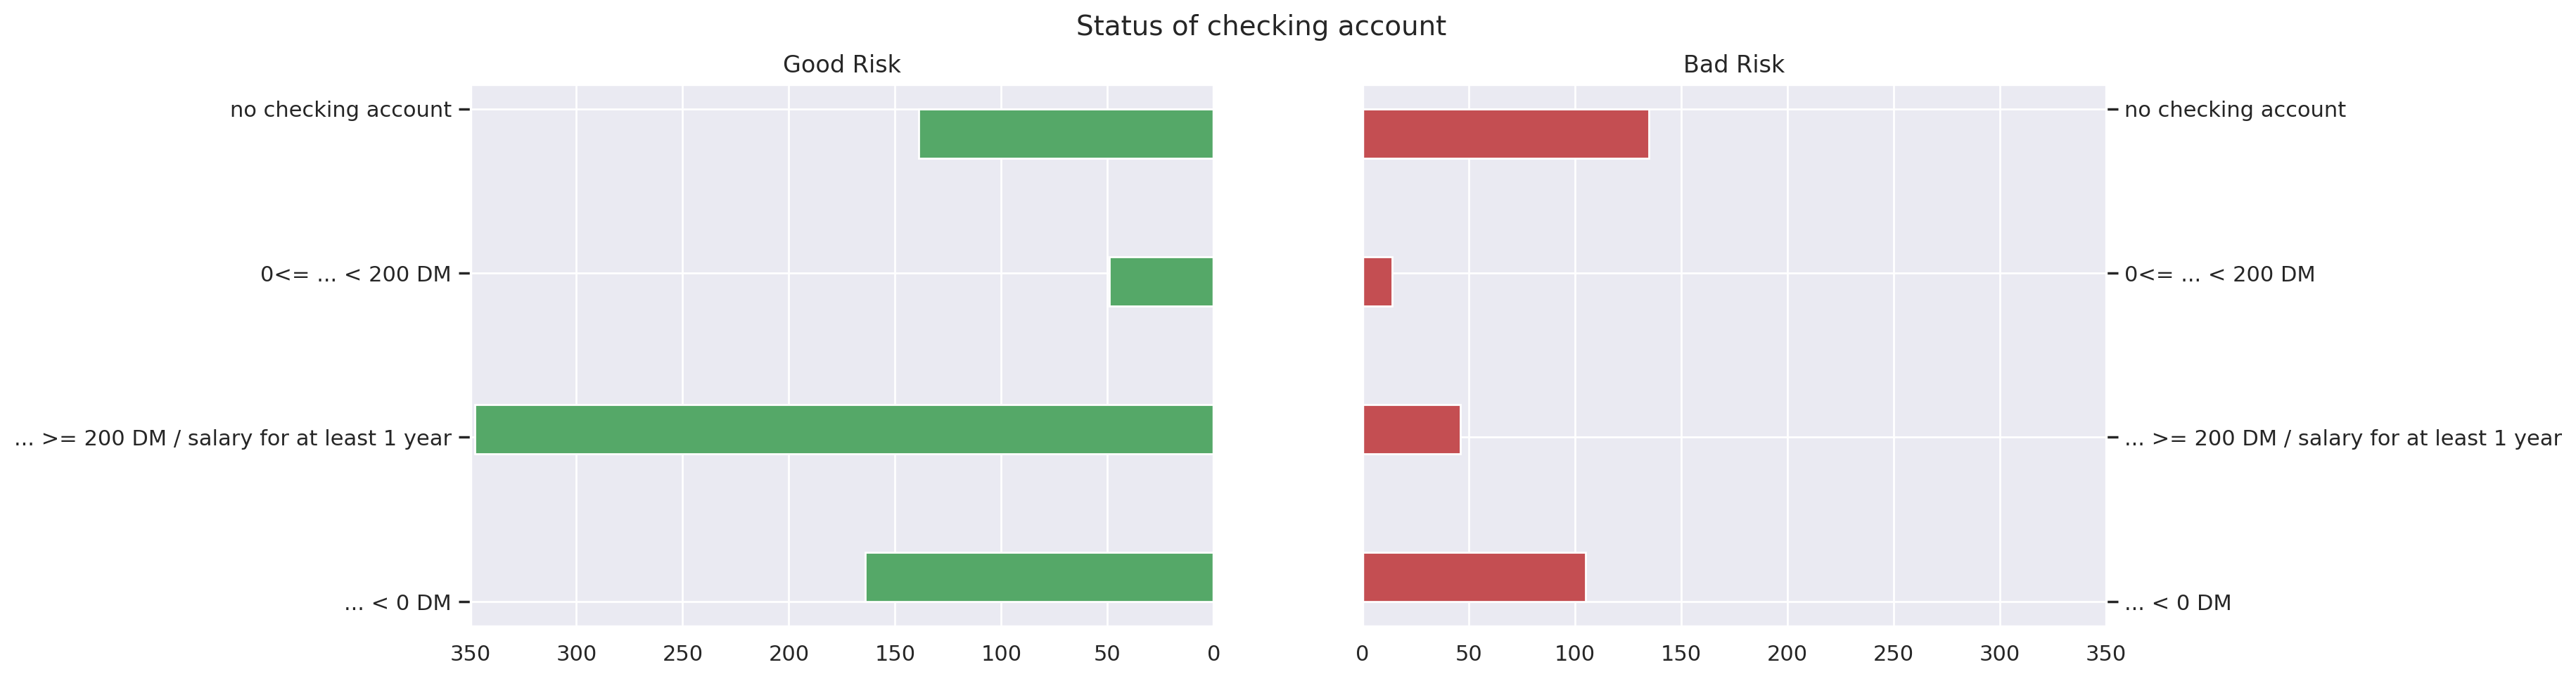

In [7]:
Good = data[data['credit_risk']  == 'good']
Bad = data[data['credit_risk']  == 'bad']
goodcredit = Good['status']
badcredit = Bad['status']
fig, ax = plt.subplots(1, 2, figsize=(15, 5))
fig.suptitle('Status of checking account', fontsize= 14)

ax[0].set_xlim([0, 350])
ax[0].hist(sorted(goodcredit), orientation= 'horizontal', color='g')
ax[0].set_xlim(ax[0].get_xlim()[::-1])
ax[0].set_title('Good Risk')
ax[0].yaxis.tick_left()

ax[1].hist(sorted(badcredit), orientation= 'horizontal', color='r')
ax[1].yaxis.tick_right()
ax[1].set_title('Bad Risk')
ax[1].set_xlim([0, 350])
plt.show()

Проинтерпретируем получившуюся гистограмму. Рассмотрим левый график, который отражает распределение людей с хорошим кредитным риском (то есть тех, кто вероятнее вернёт кредит) в зависимости от состояния рассчётного счёта. Больше всего среди людей с низким риском тех, кто относится к категории ">= 200 DM", то есть обладателей самого большого счета, или тех, у кого на счёте лежит зарплата как минимум за один год. Далее идут категории "нет расчётного счёта" и "...< 0 DM", это люди, о которых у банка либо нет информации, либо обладатели низкого дохода. Люди в этих категориях реже получают статус "хороший кредитный риск", значит им с меньшей вероятностью дадут кредит. Меньше всего людей с хорошим риском среди категории "0 <= ... <= 200 DM".

Сравним левый график с правым. Заметим, что самый большой пик в категории "нет рассчётного счёта". Это объяснимо: банк присваивает таким заёмщикам высокую степень кредитного риска, потому что у них нет гарантий того, что человек выплатит кредит. Следующая по частоте категория - это обладатели самого маленького расчетного счёта. Очень мало в категории плохого риска людей с самым большим счётом, но меньше всего людей с состоянием счёта "0 <= ... <= 200 DM" - среднего.

Я исхожу из логики "чем больше счёт, тем ниже риск", поэтому результаты по обладателям счёта "0 <= ... <= 200 DM" достаточно контринуитивны. Люди со средним счётом должны быть достаточно хорошими заёмщиками, то есть на левом графике их должно быть больше. А на правом графике видно, что меньше всего рискованых заёмщиков среди этой категории, а не среди более богатых ">= 200 DM". Возможно такое распределение объясняется тем, что по обладателям "0 <= ... <= 200 DM" данных в принципе меньше, чем по остальным. Проверим это.

In [8]:
data['status'].value_counts()

status
... >= 200 DM / salary for at least 1 year    394
no checking account                           274
... < 0 DM                                    269
0<= ... < 200 DM                               63
Name: count, dtype: int64

И действительно, таких наблюдений просто меньше, поэтому гистограмма и показывает, что эта категория людей, с одной стороны, редко обладает хорошим риском, но также и реже всего обладает плохим. То есть мы не можем однозначно судить по гистограмме, являются обладатели "0 <= ... <= 200 DM" хорошими или плохими заёмщиками. В дальнейшем мы будем полагаться на общую логику "чем больше счёт, тем ниже риск", что на гистограмме подтверждает распределение всех остальных категорий. Кроме того, мы видим, что значений "нет рассчётного счёта" очень много. Это значит, что в нашу модель мы включим достаточно большой положительный коэффициент для переменной "статус", чтобы сохранить логику.

Теперь я хочу построить скрипки в зависимости от возраста.

[Text(0.5, 1.0, 'Saving account and age')]

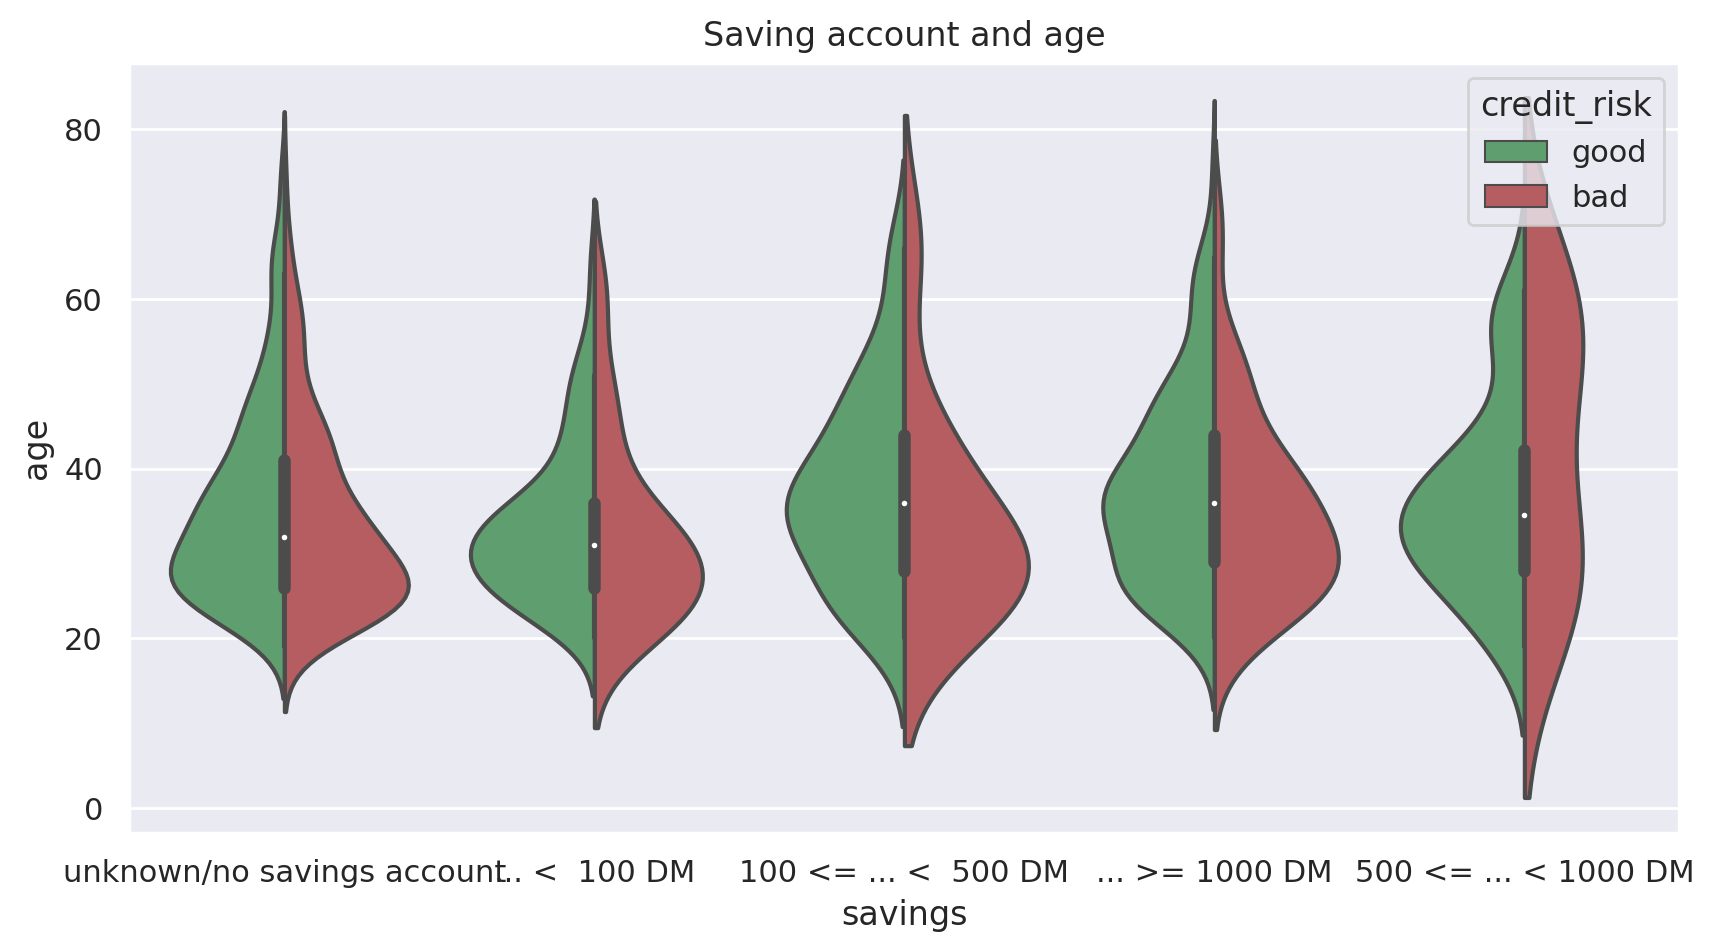

In [9]:
import seaborn as sns
plt.figure(figsize=(10, 5))
sns.violinplot(data = data, x = 'savings', y = 'age', hue = 'credit_risk', split = True, palette= ['g', 'r']).set(title='Saving account and age')

Что касается возраста, судя по графику, он не сильно влияет на распределение в зависимости от размера счёта, пики у всех графиков с обоих сторон каждой скрипки находятся в районе 30 лет. Кроме того, мы видим, что распределение почти везде не похоже на нормальное, особенно ярко это показывает график "500 <= ... <= 1000", плохой риск в этой категории очень равномерно распредён по всем возрастам, потому что в принципе богатые люди вне зависимости от возраста скорее надёжные клиенты. Три правых распределения, как хороших, так и плохих заёмщиков, характеризуются достаточно высокой дисперсией. Судя по этим графикам, возраст практически не оказывает влияния на надёжность или ненадёжность клиента.

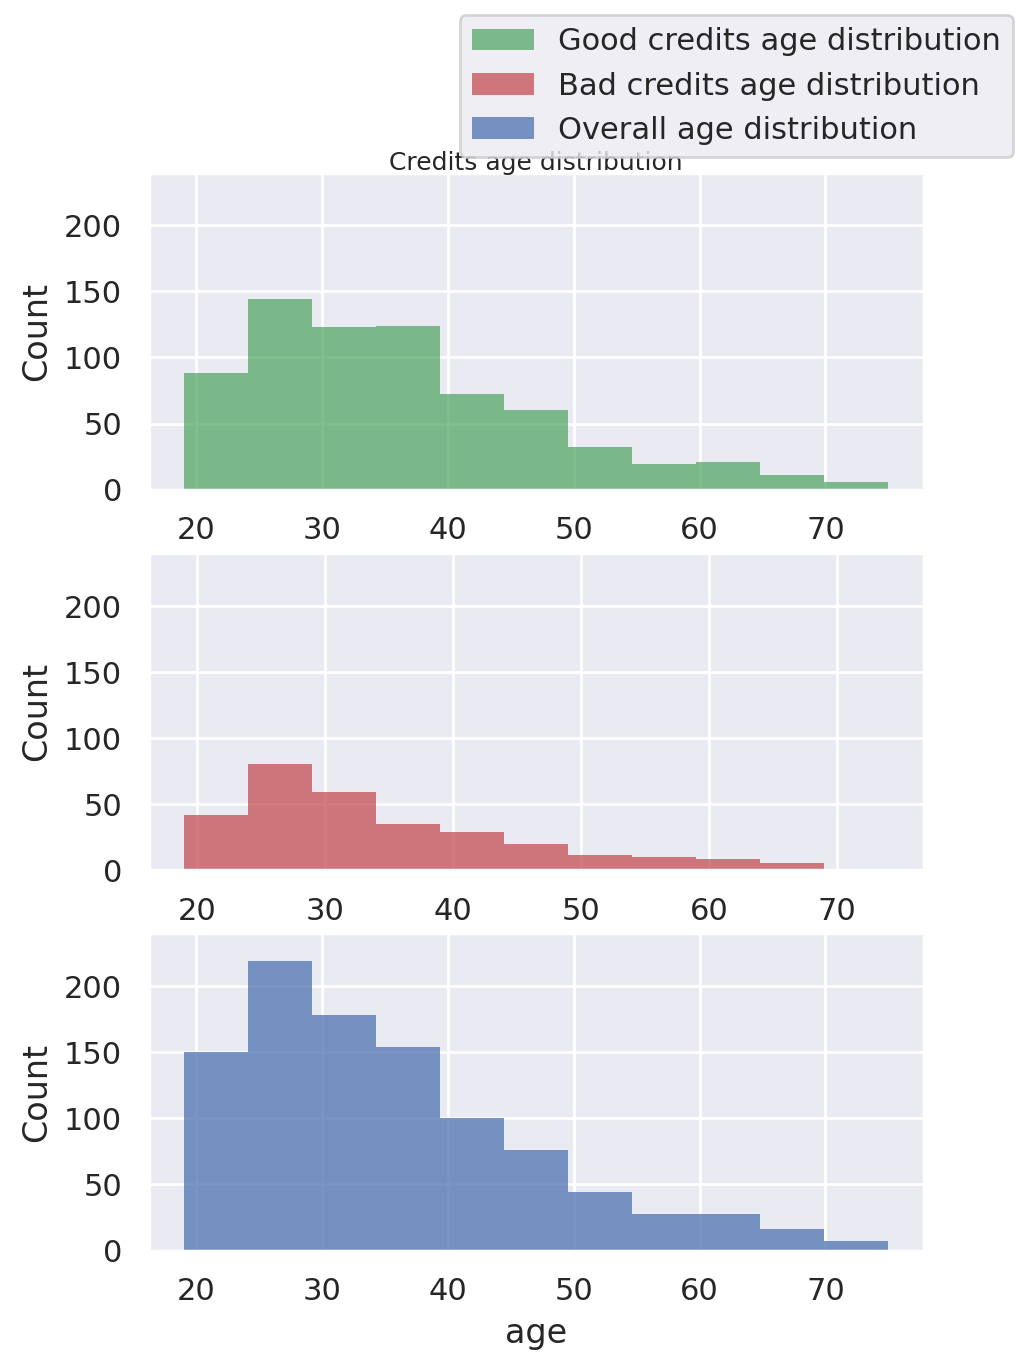

In [10]:
fig, ax = plt.subplots(3, 1, figsize=(5, 7))
bad = data[data['credit_risk'] == 'bad']
good = data[data['credit_risk'] == 'good']
ax[0].set_ylim([0, 240])
ax[1].set_ylim([0, 240])
ax[2].set_ylim([0, 240])
sns.histplot(data=good, x="age", bins= 11, color="g", ax=ax[0], linewidth = 0)
sns.histplot(data=bad, x="age", bins= 11, color="r", ax=ax[1], linewidth = 0)
sns.histplot(data=data, x="age", bins= 11, color="b", ax=ax[2], linewidth = 0)
fig.legend(labels = ['Good credits age distribution', 'Bad credits age distribution', 'Overall age distribution'])
plt.title('Credits age distribution', y=3.355, fontsize = 9)
plt.show()

По гистограммам видно, что наблюдений по всем возрастам больше среди надежных клиентов. Заметим, что на всех трёх графиках самый высокий пик находится на 25-27 годах, эти люди в целом чаще берут кредиты - их больше как по положительным, так и по отрицательным случаям. Заметим, что более надёжными считаются заёмщики 35-40 лет, на верхнем графике по этим значениям мы наблюдщаем пик, что не повторяет динамину по всем наблюдениям вместе. На зелёном графике также заметим небольшой пик на значении возраста 60-65 лет. В целом, мы не можем сказать, что возраст связан надёжностью клиента.

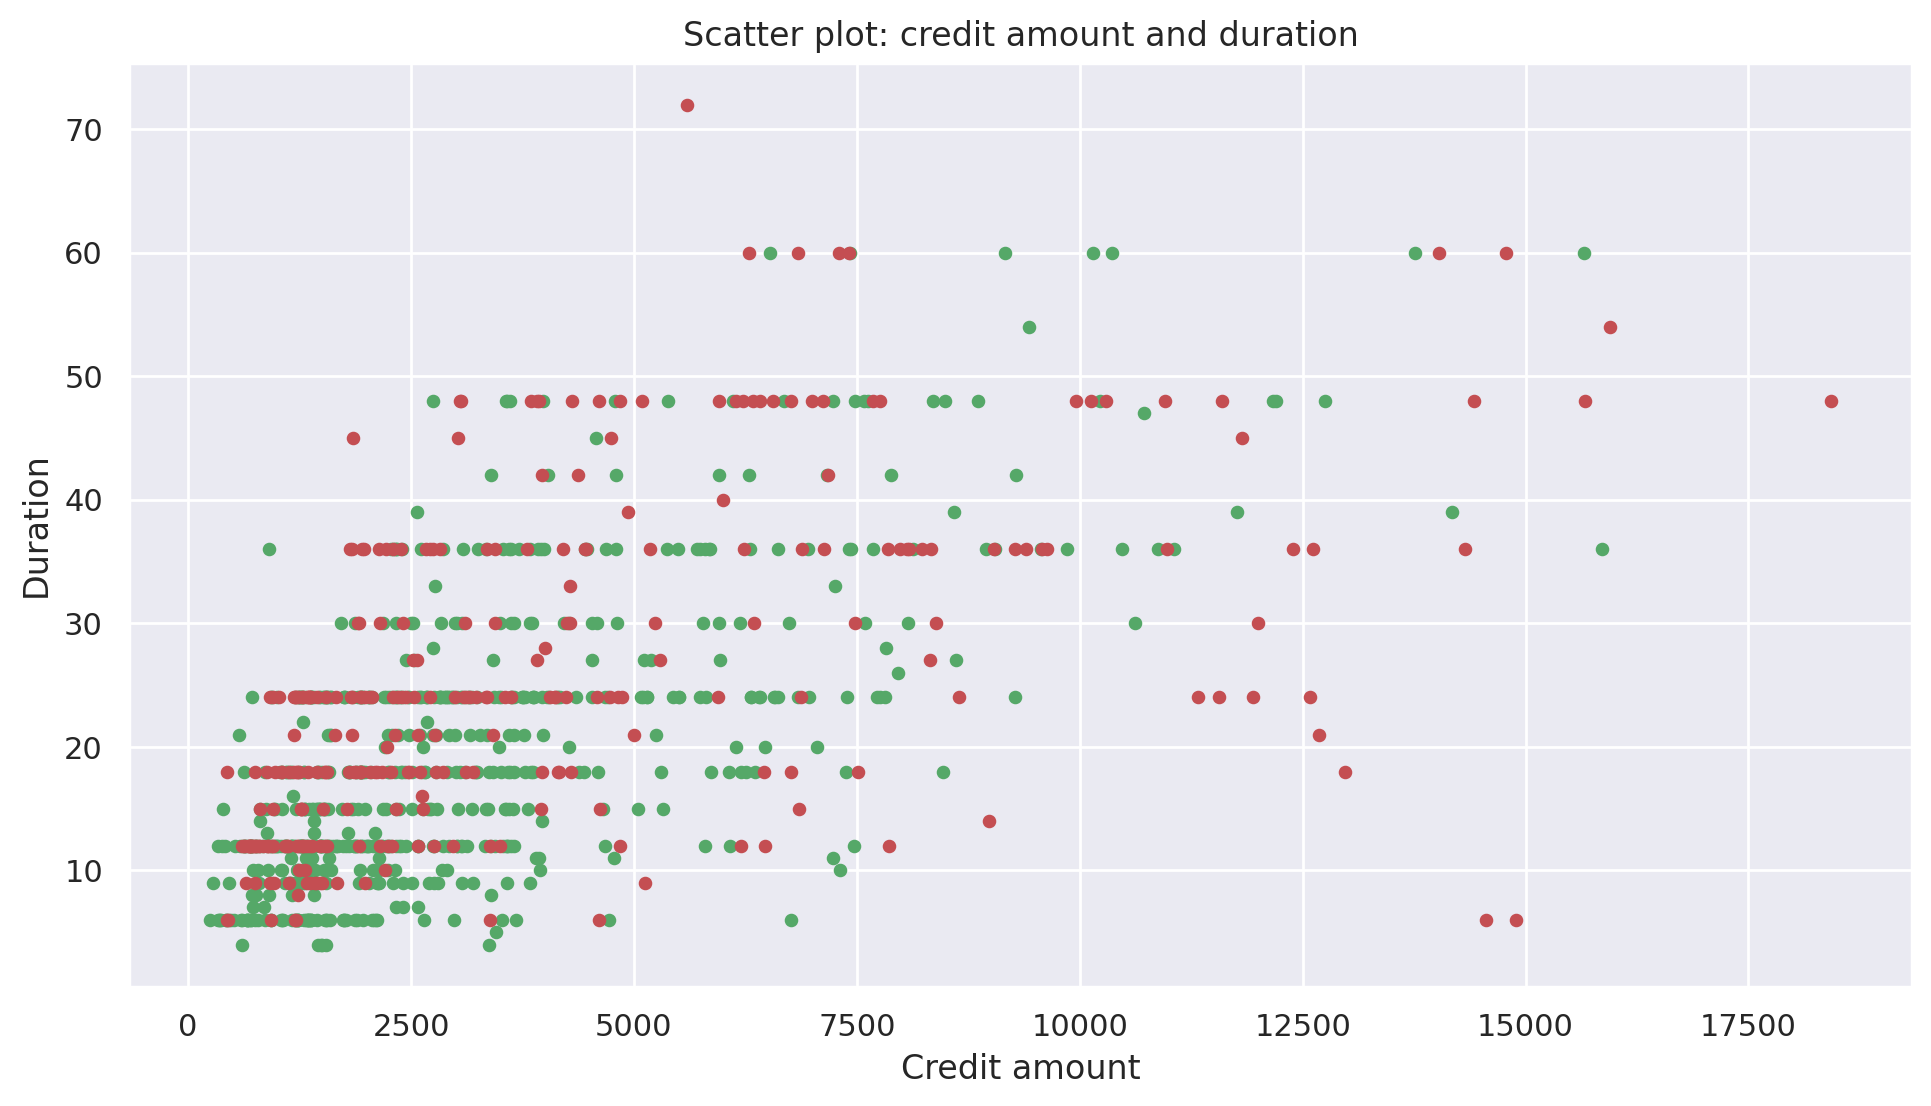

In [11]:
fig, ax = plt.subplots(figsize=(11.5, 6))
plt.title('Scatter plot: credit amount and duration')
bad = data[data['credit_risk'] == 'bad']
good = data[data['credit_risk'] == 'good']
ax.scatter(x = good['amount'], y = good['duration'], color = 'g', s = 15)
ax.scatter(x = bad['amount'], y = bad['duration'], color = 'r', s = 15)
plt.xlabel("Credit amount")
plt.ylabel("Duration")

plt.show()

Рассмотрим диаграмму рассеяния. Видно, что размер кредита и продолжительность скореллированы между собой, но не слишком сильно - точки не скучены вокруг прямой, есть выбросы. На небольших значениях размера кредита положительная связь более сильная, чем на больших. Однако для нашей задачи - кредитного скоринга - нас больше интересует сравнение распределения положительных и отрицательных кейсов. Мы видим, что ненадёжные заёмщики чаще берут большие кредиты по сравнению с надёжными заёмщиками. При этом, только среди ненадёжных заёмщиков есть случаи большой суммы кредита на маленький срок. Мы также видим один сильный выброс - небольшой кредит на очень большой срок, этот клиент тоже считается ненадёжным. Данные по надёжным клиентам в целом более сильно скоррелированы, то есть для надёжных заёмщиков справедливо утверждение "чем больше размер кредита, тем больше срок".

Text(0.5, 0, 'Age')

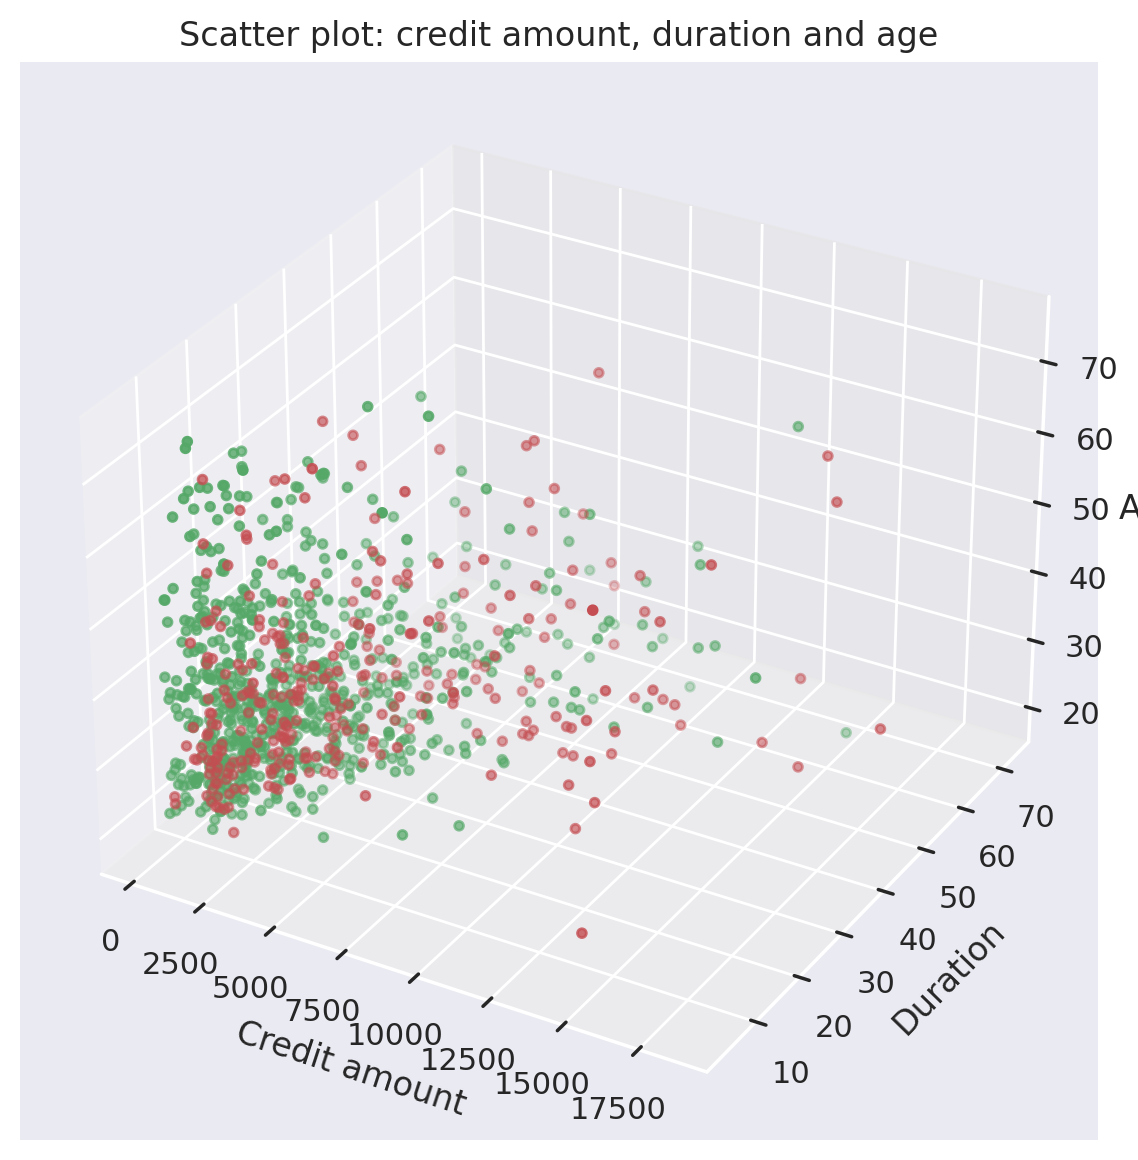

In [12]:
fig = plt.figure(figsize = (10, 7))
bad = data[data['credit_risk'] == 'bad']
good = data[data['credit_risk'] == 'good']
ax = plt.axes(projection ="3d")
ax.set_title("Scatter plot: credit amount, duration and age")
ax.scatter3D(xs = good['amount'], ys = good['duration'], zs = good['age'], color = 'g', s = 10)
ax.scatter3D(xs = bad['amount'], ys = bad['duration'], zs = bad['age'], color = 'r', s = 10)
plt.xlabel("Credit amount")
plt.ylabel("Duration")
ax.set_zlabel('Age')

На трехмерном графике видим, что сопряженность между размером кредита и длительностью сохранилась, это станет понятно, если посмотреть на нижнюю плоскость нашего графика. При этом, возраст не связан отчётливо с размером кредита или длительностью, точки на графике не кучкуются вокруг прямой в трёхмерном пространстве. Кроме того, как и показывали гистограммы выше, возраст не сопряжен с надёжностью клиента.

***Часть 2: преобразование данных***

In [13]:
data.isna().any().any()

False

Видим, что в данных нет пропущенных значений

Теперь займемся перекодировкой. Мне не нравится как в этом случае работает автоматический label-encoding, посокльку он присваивает метки категориальным признакам случайно. Но, например, я считаю, что чем больше значение savings, тем больше вероятность, что перед нами надежный заемщик. Соотвтетственно, мне важно, чтобы метка была тем выше, чем больше значение этой переменной (смаое большое у '... >= 1000 DM'). Аналогичная логика у меня и с другими категормальными признаками, поэтому, чтобы избежать путаницы, я хочу использовать ручную кодировку для порядковых признаков. С просто категориальными признаками я действую стандартно и использую get_dummies, бинарные тоже кодирую как обычно.

In [14]:
#Ответ
data['credit_risk'] = data['credit_risk'].apply(lambda x: 1 if x == 'good' else 0)

#Категориальные признаки
categorical_cols = ['purpose', 'personal_status_sex', 'other_debtors', 'other_installment_plans', 'housing']
data = pd.get_dummies(data, columns=categorical_cols, drop_first=True)

#Бинарные признаки
binary_cols = ['foreign_worker']
for col in binary_cols:
    data[col] = data[col].apply(lambda x: 1 if x == 'yes' else 0)

In [15]:
#Обработка порядковых признаков
data['status'] = data['status'].replace({'no checking account': 0, '... < 0 DM': 1, '0<= ... < 200 DM': 2, '... >= 200 DM / salary for at least 1 year': 3})
data['savings'] = data['savings'].replace({'unknown/no savings account': 0, '... <  100 DM': 1, '100 <= ... <  500 DM': 2, '500 <= ... < 1000 DM': 3, '... >= 1000 DM': 4})
data['credit_history'] = data['credit_history'].replace({'critical account/other credits elsewhere': 0, 'delay in paying off in the past': 1, 'existing credits paid back duly till now': 2, 'no credits taken/all credits paid back duly': 3, 'all credits at this bank paid back duly': 4})
data['employment_duration'] = data['employment_duration'].replace({'unemployed': 0, '< 1 yr': 1, '1 <= ... < 4 yrs': 2, '4 <= ... < 7 yrs': 3, '>= 7 yrs': 4})
data['installment_rate'] = data['installment_rate'].replace({'< 20': 0, '20 <= ... < 25': 1, '25 <= ... < 35': 2, '>= 35': 3})
data['present_residence'] = data['present_residence'].replace({'< 1 yr': 0, '1 <= ... < 4 yrs': 1, '4 <= ... < 7 yrs': 2, '>= 7 yrs': 3})
data['property'] = data['property'].replace({'unknown / no property': 0, 'building soc. savings agr./life insurance': 1, 'car or other': 2, 'real estate': 3})
data['number_credits'] = data['number_credits'].replace({'1': 3, '2-3': 2, '4-5': 1, '>= 6': 0})
data['job'] = data['job'].replace({'unemployed/unskilled - non-resident': 0, 'unskilled - resident': 1, 'skilled employee/official': 2, 'manager/self-empl./highly qualif. employee': 3})

data.head()

status  duration  credit_history  amount  savings  employment_duration  \
0       0        18               4    1049        0                    1   
1       0         9               4    2799        0                    2   
2       1        12               3     841        1                    3   
3       0        12               4    2122        0                    2   
4       0        12               4    2171        0                    2   

   installment_rate  present_residence  property  age  ...  purpose_vacation  \
0                 0                  3         2   21  ...             False   
1                 2                  1         0   36  ...             False   
2                 2                  3         0   23  ...             False   
3                 1                  1         0   39  ...             False   
4                 0                  3         2   38  ...             False   

   personal_status_sex_female : single  \
0                                False   
1                                False   
2                                False   
3                                False   
4                                False   

  personal_status_sex_male : divorced/separated  \
0                                         False   
1                                         False   
2                                         False   
3                                         False   
4                                         False   

  personal_status_sex_male : married/widowed  other_debtors_guarantor  \
0                                      False                    False   
1                                       True                    False   
2                                      False                    False   
3                                       True                    False   
4                                       True                    False   

   other_debtors_none  other_installment_plans_none  \
0                True                          True   
1                True                          True   
2                True                          True   
3                True                          True   
4                True                         False   

   other_installment_plans_stores  housing_own  housing_rent  
0                           False        False         False  
1                           False        False         False  
2                           False        False         False  
3                           False        False         False  
4                           False        False          True  

[5 rows x 34 columns]

Выбросим некотороые бесполезные признаки:

In [16]:
data.drop(columns = ['people_liable', 'telephone'], inplace = True)

In [17]:
data['foreign_worker'].describe()

count    1000.000000
mean        0.037000
std         0.188856
min         0.000000
25%         0.000000
50%         0.000000
75%         0.000000
max         1.000000
Name: foreign_worker, dtype: float64

In [18]:
# Создание новых фичей
data['debt_to_duration_ratio'] = data['amount'] / data['duration']
data['age_group'] = pd.cut(data['age'], bins=[0, 25, 35, 45, 55, 100], labels=[1, 2, 3, 4, 5])
data['employment_stability'] = data['job'] * data['employment_duration']
data['housing_stability'] = data['present_residence'] * data['housing_own']
data['credit_utilization'] = data['amount'] / (data['number_credits'] + 1)
data['credit_history_utilization'] = data['amount'] / (data['credit_history'] + 1)

Я придумала несколько новых фичей, которые потенциально могут улучшить качество моделирования. Сначала я опишу их:

1) debt_to_duration_ratio - переменная, которая отражает отношение суммы кредита к его длительности, учитывая диаграммы рассеяния, которые я построила выше, это может стать полезным признаком

2) age_group - показатель возрастной группы может быть полезнее возраста, учитывая гистограммы выше

3) employment_stability - показатель, который будет отражать стабильность занятости

4) 'housing_stability - показатель для стабильности жилья

5) credit_utilization и credit_history_utilization - фичи, которые призваны отражать отношение размера кредита к числу уже возращенных кредитов и к кредитной истории

In [19]:
data.head()

status  duration  credit_history  amount  savings  employment_duration  \
0       0        18               4    1049        0                    1   
1       0         9               4    2799        0                    2   
2       1        12               3     841        1                    3   
3       0        12               4    2122        0                    2   
4       0        12               4    2171        0                    2   

   installment_rate  present_residence  property  age  ...  \
0                 0                  3         2   21  ...   
1                 2                  1         0   36  ...   
2                 2                  3         0   23  ...   
3                 1                  1         0   39  ...   
4                 0                  3         2   38  ...   

   other_installment_plans_none  other_installment_plans_stores  housing_own  \
0                          True                           False        False   
1                          True                           False        False   
2                          True                           False        False   
3                          True                           False        False   
4                         False                           False        False   

   housing_rent  debt_to_duration_ratio  age_group  employment_stability  \
0         False               58.277778          1                     2   
1         False              311.000000          3                     4   
2         False               70.083333          1                     3   
3         False              176.833333          3                     2   
4          True              180.916667          3                     2   

   housing_stability  credit_utilization  credit_history_utilization  
0                  0          262.250000                      209.80  
1                  0          933.000000                      559.80  
2                  0          210.250000                      210.25  
3                  0          707.333333                      424.40  
4                  0          723.666667                      434.20  

[5 rows x 38 columns]

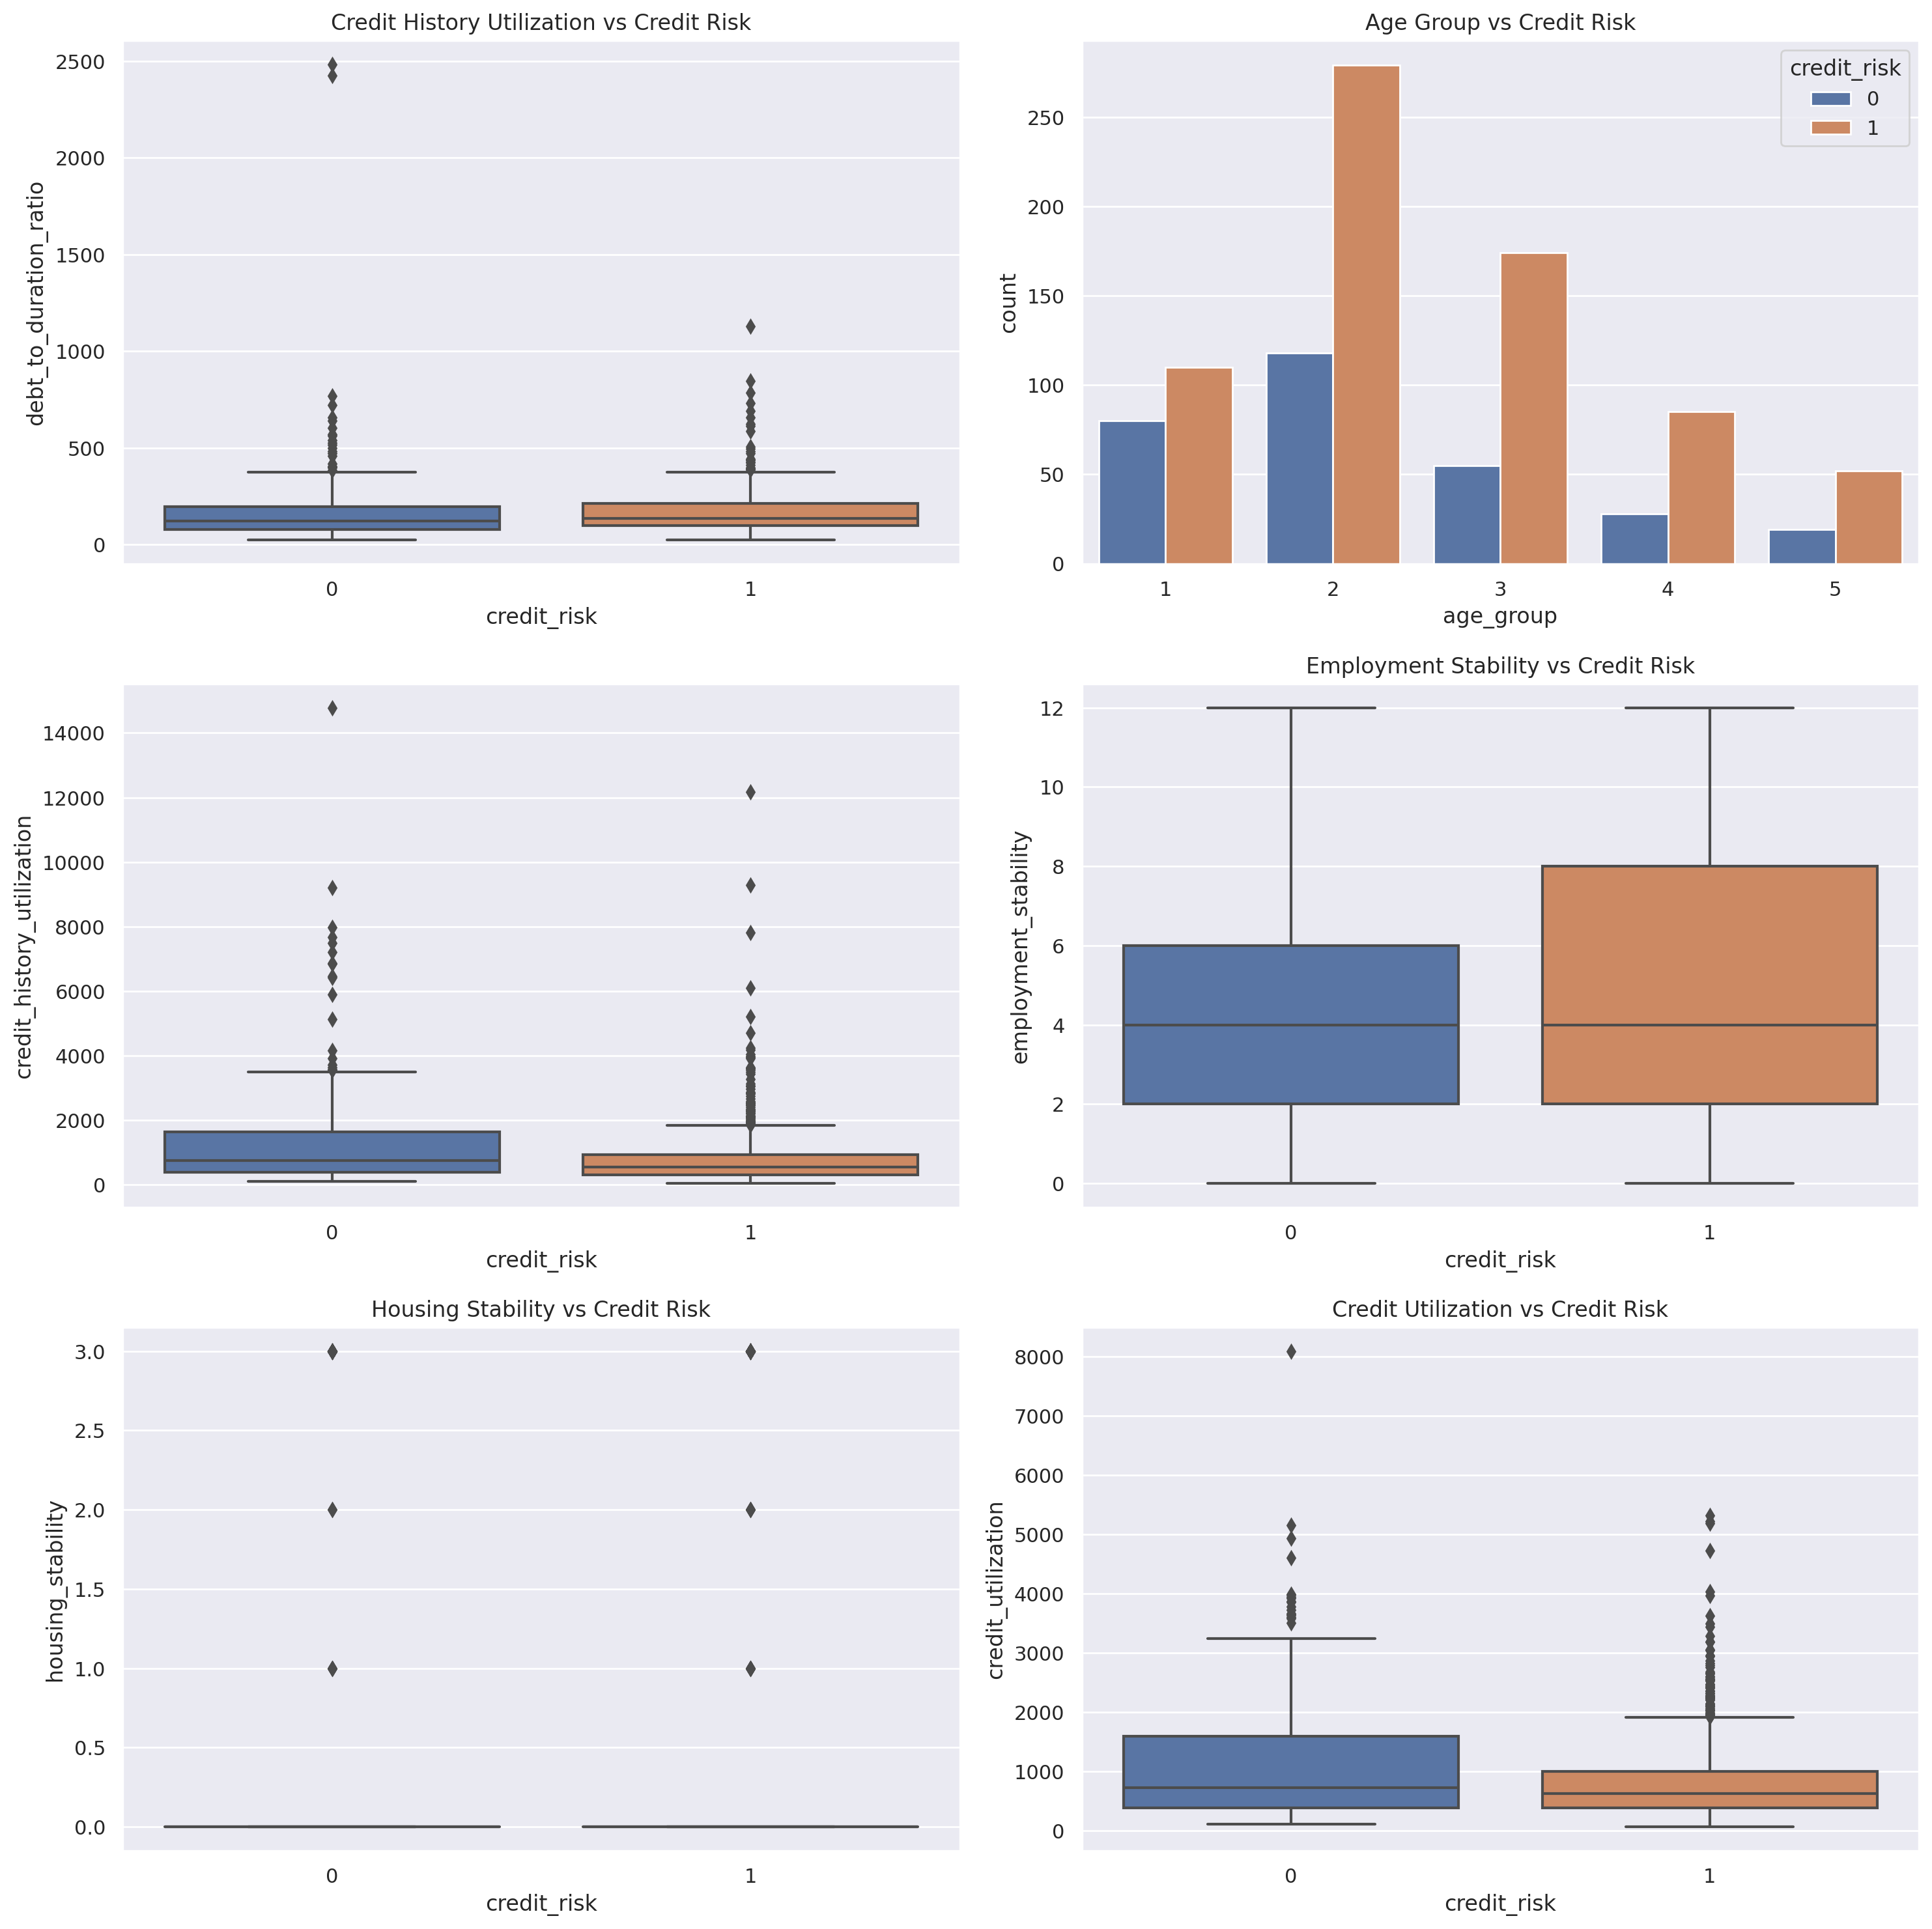

In [20]:
fig, axes = plt.subplots(3, 2, figsize=(15, 15))

# debt_to_income_ratio
sns.boxplot(x='credit_risk', y='debt_to_duration_ratio', data=data, ax=axes[0, 0])
axes[0, 0].set_title('Debt-to-Duratio Ratio vs Credit Risk')

# age_group
sns.countplot(x='age_group', hue='credit_risk', data=data, ax=axes[0, 1])
axes[0, 1].set_title('Age Group vs Credit Risk')

sns.boxplot(x='credit_risk', y='credit_history_utilization', data=data, ax=axes[1, 0])
axes[0, 0].set_title('Credit History Utilization vs Credit Risk')

# employment_stability
sns.boxplot(x='credit_risk', y='employment_stability', data=data, ax=axes[1, 1])
axes[1, 1].set_title('Employment Stability vs Credit Risk')

# housing_stability
sns.boxplot(x='credit_risk', y='housing_stability', data=data, ax=axes[2, 0])
axes[2, 0].set_title('Housing Stability vs Credit Risk')

# credit_utilization
sns.boxplot(x='credit_risk', y='credit_utilization', data=data, ax=axes[2, 1])
axes[2, 1].set_title('Credit Utilization vs Credit Risk')

plt.tight_layout()
plt.show()

Глянем на корреляционную матрицу, потому что есть ощущение, что некоторое признаки взаимосвязаны.

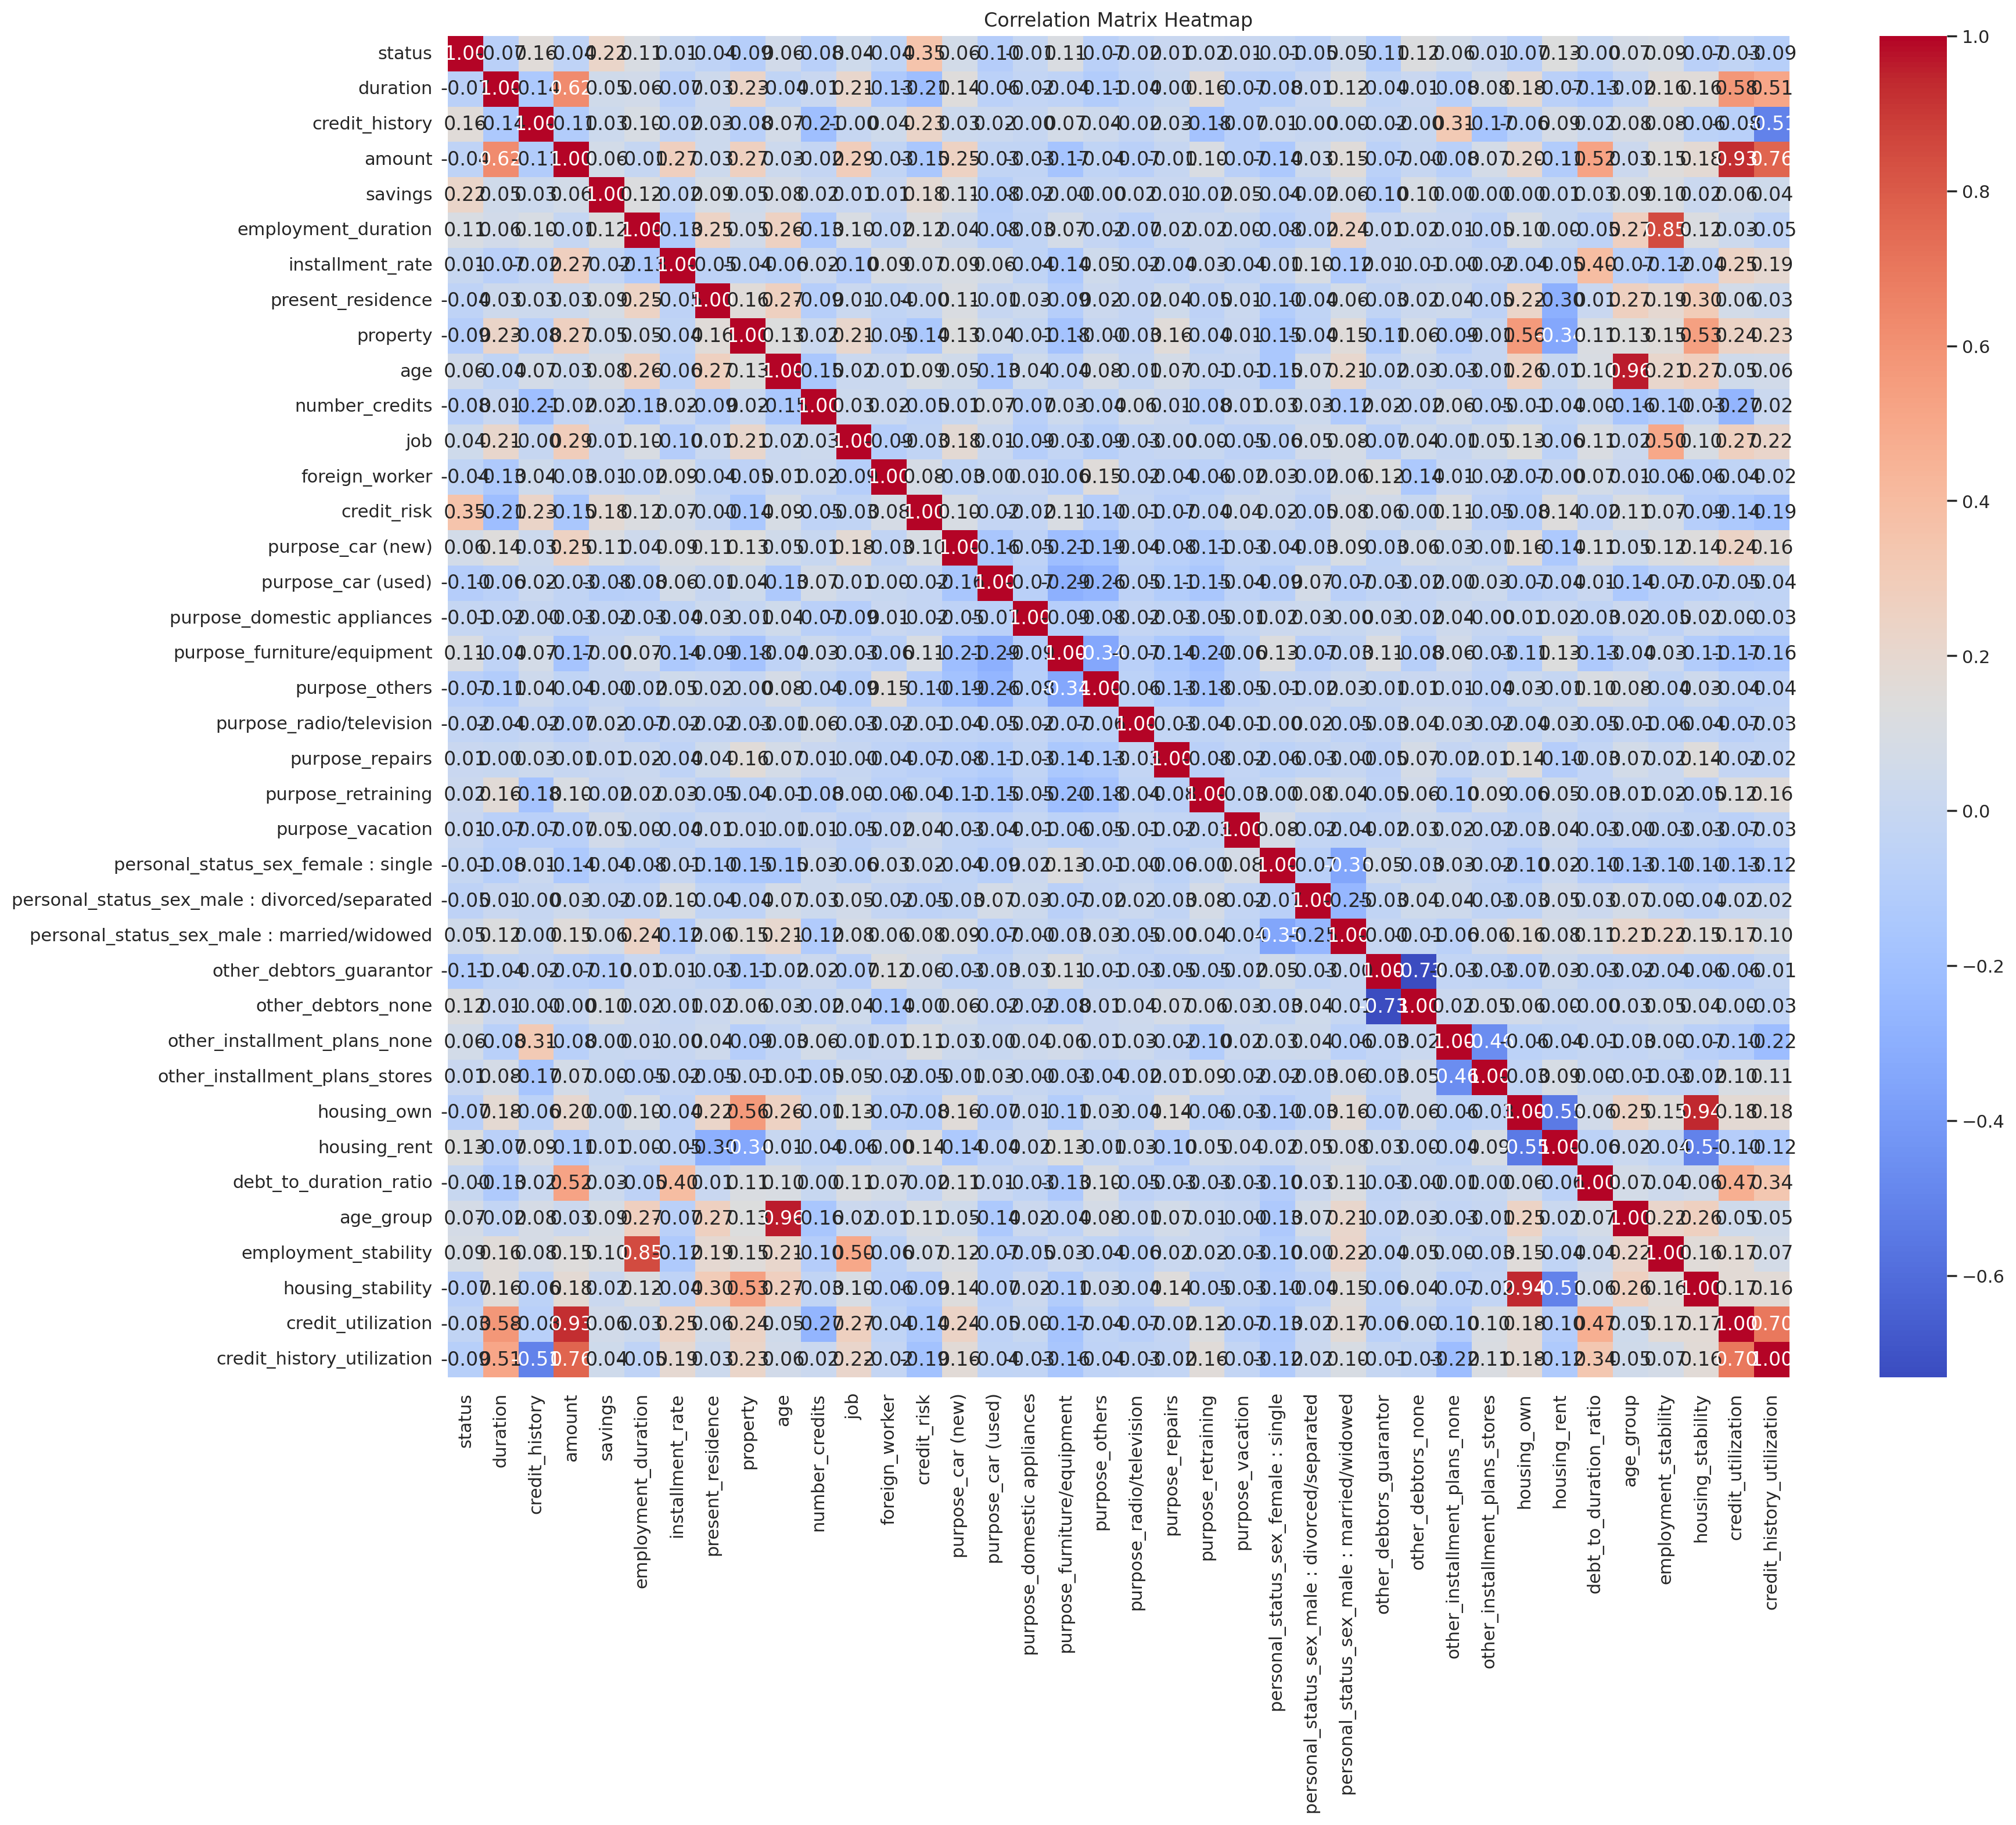

In [21]:
corr_matrix = data.corr()

plt.figure(figsize=(20, 15))
sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap='coolwarm', cbar=True, square=True)
plt.title('Correlation Matrix Heatmap')
plt.show()

Мы видим, что у некоторых ручных фичей очень большая корреляция с изначальными, придется кое-что выбросить:

In [22]:
data.drop(columns = ['age', 'credit_history_utilization', 'housing_own', 'employment_duration', 'credit_utilization'], inplace = True)

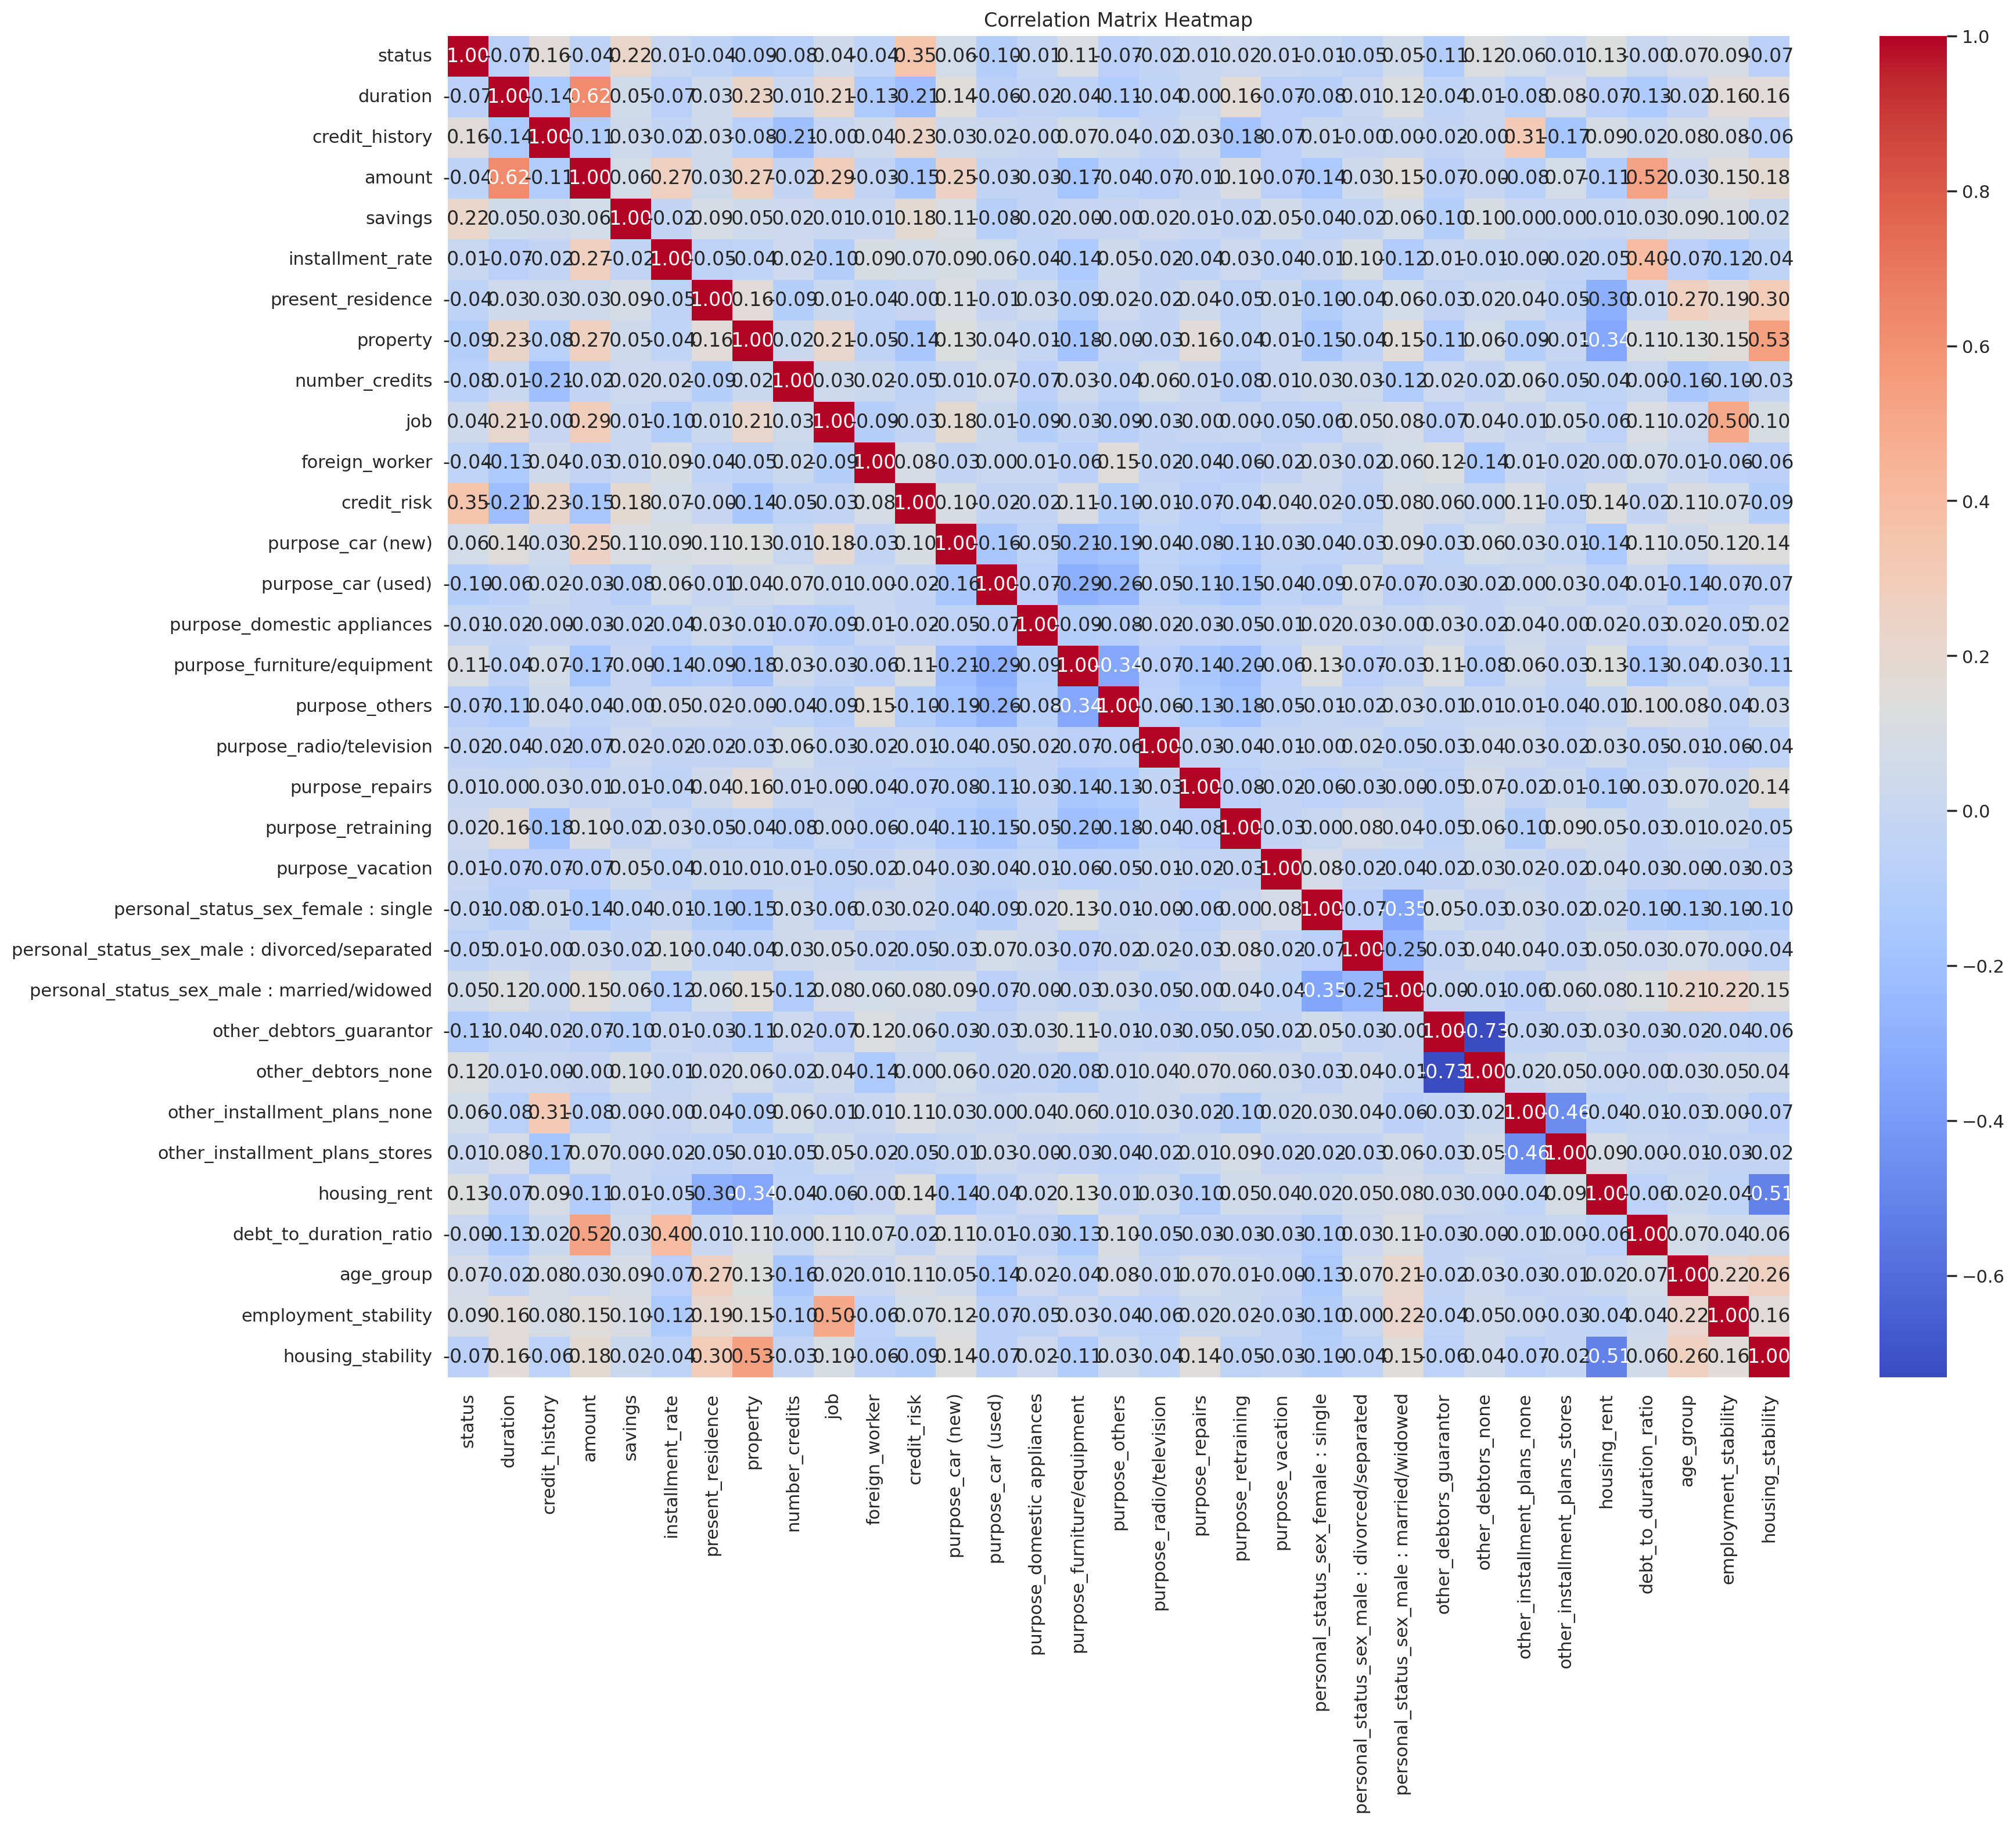

In [23]:
corr_matrix = data.corr()

plt.figure(figsize=(20, 15))
sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap='coolwarm', cbar=True, square=True)
plt.title('Correlation Matrix Heatmap')
plt.show()

Вроде выглядит приличнее, хотя пришлось удалить нексколько ручных фичей. Теперь поделим выборку на обучающую и тестовую.

Перед основной частью работы следует сделать еще одну важную для задачи классфикации вещь: проверить баланс классов и поработать с ним.

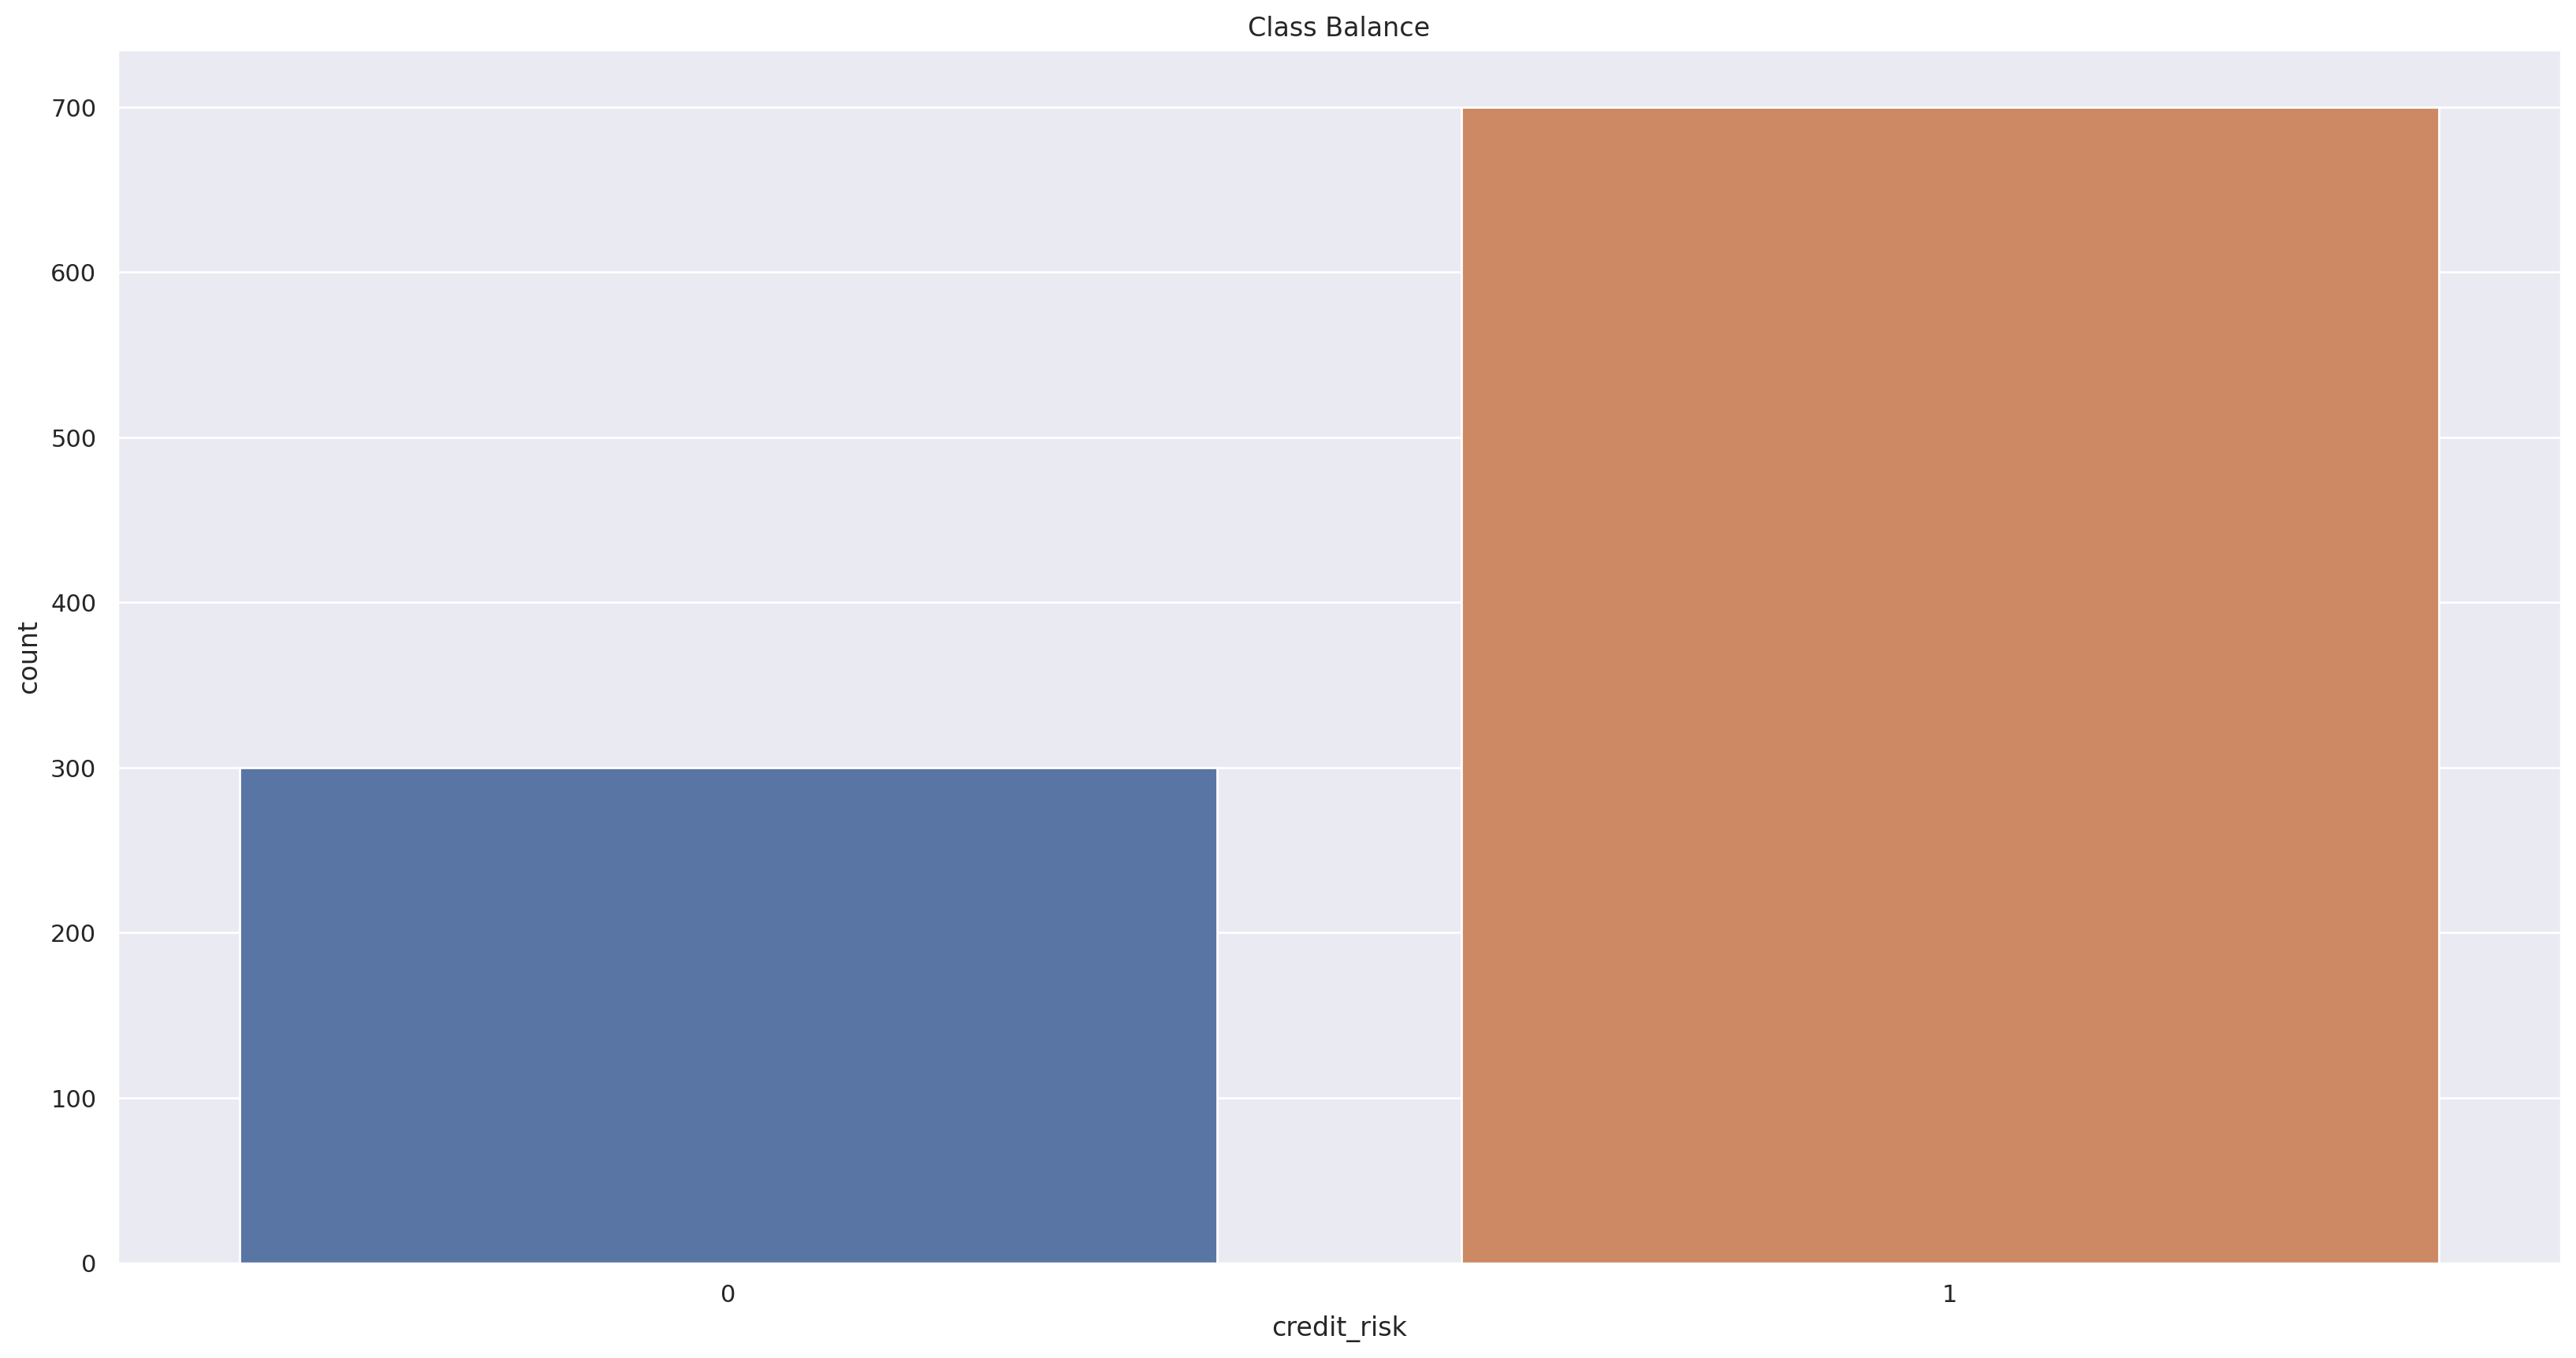

In [24]:
sns.countplot(x='credit_risk', data=data)
plt.title('Class Balance')
plt.show()

Можно заметить, что наши дела не так хороши как хотелось бы, хороших заёмщиков почти вдвое больше, чем плохих. Минимум, что я могу с этим сделать - сохранить баланс классов в тесте и в обучении.

In [25]:
from sklearn.model_selection import train_test_split

X = data.drop(columns=['credit_risk'])
y = data['credit_risk']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42,  stratify=y)

print(f'Training data shape: {X_train.shape}')
print(f'Test data shape: {X_test.shape}')

Training data shape: (800, 32)
Test data shape: (200, 32)


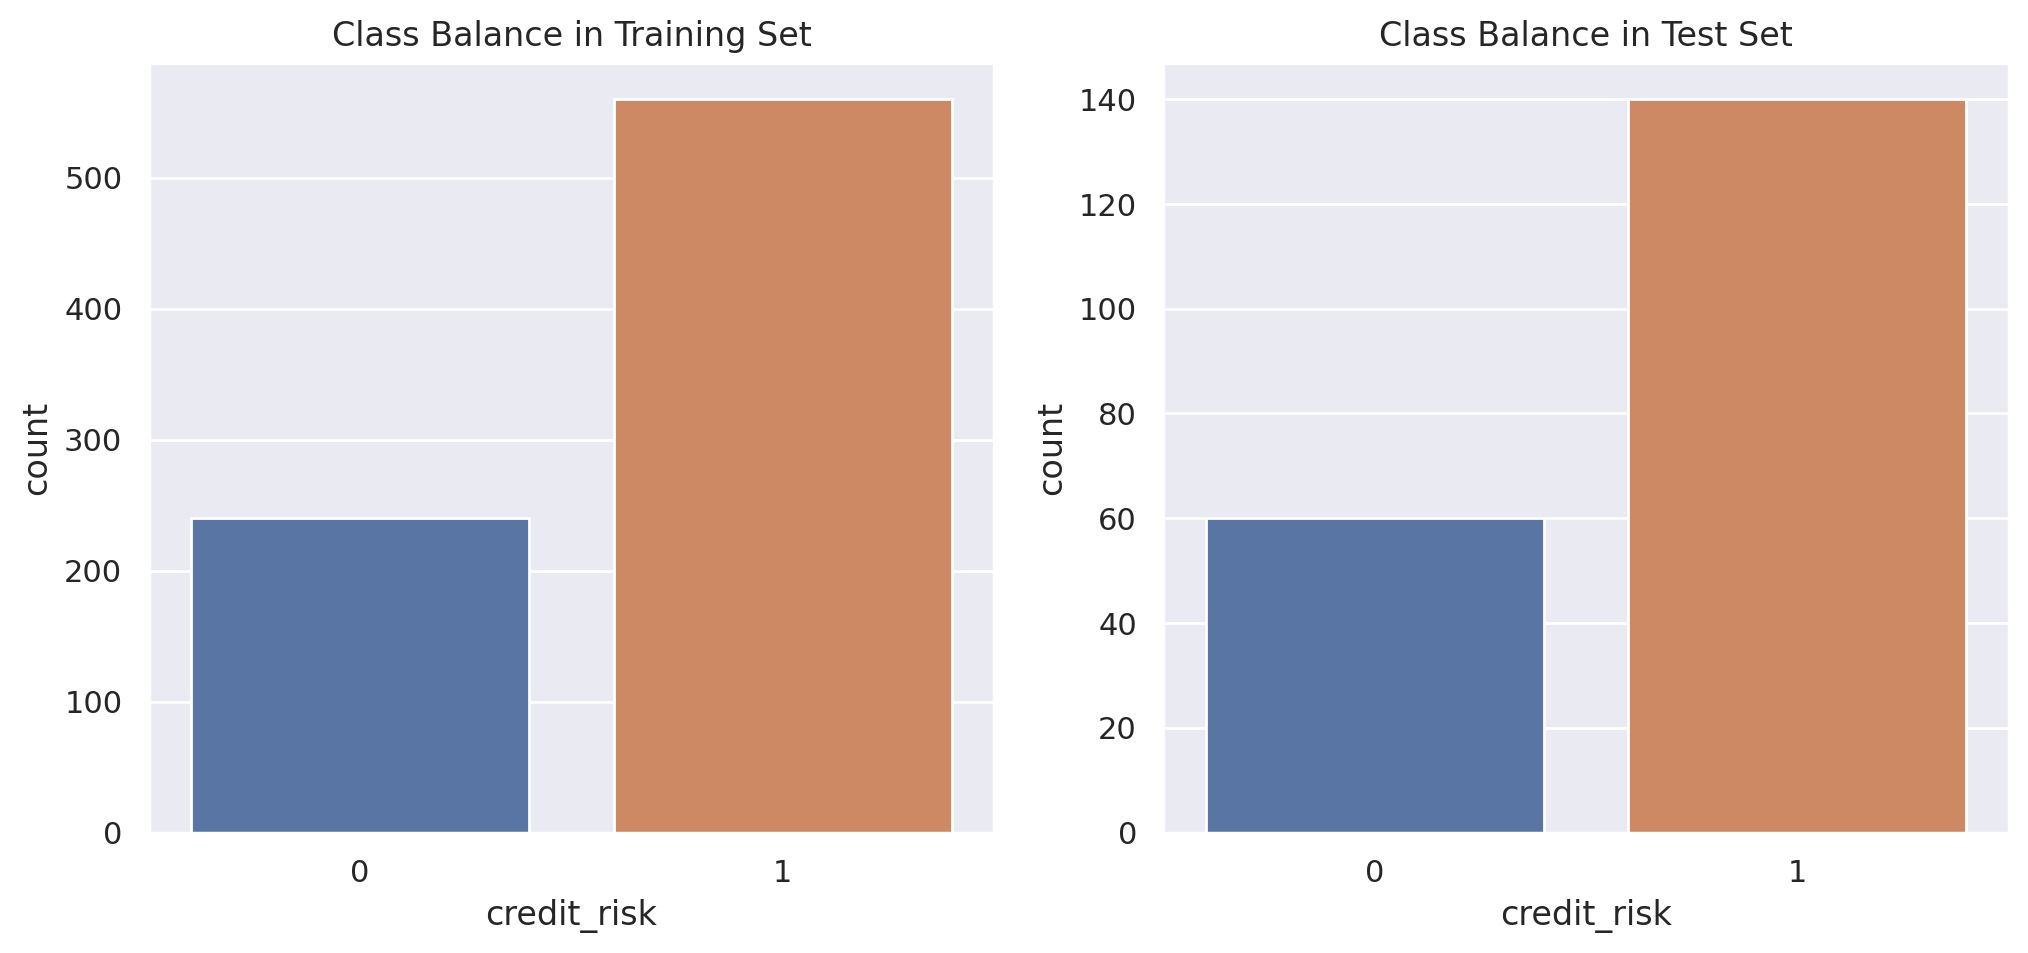

In [26]:
fig, ax = plt.subplots(1, 2, figsize=(12, 5))
sns.countplot(x=y_train, ax=ax[0])
ax[0].set_title('Class Balance in Training Set')
sns.countplot(x=y_test, ax=ax[1])
ax[1].set_title('Class Balance in Test Set')
plt.show()

In [27]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, roc_auc_score, f1_score, confusion_matrix, classification_report
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
import seaborn as sns
import matplotlib.pyplot as plt

In [28]:
scaler = StandardScaler()
X_train[['duration', 'amount', 'housing_stability', 'debt_to_duration_ratio']] = scaler.fit_transform(X_train[['duration', 'amount', 'housing_stability', 'debt_to_duration_ratio']])
X_test[['duration', 'amount', 'housing_stability', 'debt_to_duration_ratio']]= scaler.transform(X_test[['duration', 'amount', 'housing_stability', 'debt_to_duration_ratio']])

Теперь построим бейзлайн модель, с которой мы будем сравнивать все остальные

In [29]:
baseline_preds = [1] * len(y_test)
print(f"Baseline Accuracy: {accuracy_score(y_test, baseline_preds):.4f}")
print(f"Baseline ROC AUC: {roc_auc_score(y_test, baseline_preds):.4f}")
print(f"Baseline F1 Score: {f1_score(y_test, baseline_preds):.4f}")

Baseline Accuracy: 0.7000
Baseline ROC AUC: 0.5000
Baseline F1 Score: 0.8235


В таких прекрасных результатах этой нехитрой модели стоит винить как раз баланс классов, работаем с тем, что есть - попробуем выбить больше на остальных моделях)

Перед тем, как я приступлю к моделированию, стоит выдвинуть несколько гипотез:

1) В срденем при прочих равных условиях я ожидаю, что размер сберегательного счета (принадлежность к высокой категории) будет положительно взаимосвязан с логистическими шансами стать хорошим заемщиком.

2) В средеем при прочих равных условиях я ожидаю, что размер кредита, поделенный на его длительность, будет отрицательно взаимосвязан с логистическими шансами получить кредит. Объясню: сложнее всего вернуть большой кредит за короткий срок, большие значения это переменной отражают как раз такую ситуацию.

3) Хорошая кредитная история в среднем при прочих равных положительно взаимосвязана с логистическими шансами выступить хорошим заёмщиком.  Хорошая кредитная история обычно указывает на ответственность заемщика в управлении долгами, тогда как плохая кредитная история указывает на высокую вероятность дефолта.

Следует так же описать модели, которые я построю в дальнейшем и объяснить выбор:

***Логистическая регрессия***
Почему она подходит:

Интерпретируемость: Логистическая регрессия предоставляет четкие коэффициенты, которые легко интерпретировать. Это важно для задач кредитного скоринга, где требуется объяснить решения модели регуляторам или самим клиентам.
Бинарная классификация: Логистическая регрессия специально разработана для задач бинарной классификации, что делает ее естественным выбором для предсказания кредитного риска (good/bad).
Скорость и эффективность: Логистическая регрессия относительно быстро обучается и выполняется, что делает ее подходящей для работы с большими наборами данных.
Гребневая логистическая регрессия (Ridge Logistic Regression)
Почему она подходит:

Регуляризация: Гребневая регрессия добавляет регуляризацию к стандартной логистической регрессии, что помогает предотвратить переобучение, особенно в случаях с высокоразмерными данными или большим количеством признаков.
Устойчивость к шуму: Регуляризация помогает модели быть более устойчивой к шуму в данных, что может улучшить общую производительность модели.
Контроль сложности модели: Гиперпараметр регуляризации (λ) позволяет контролировать сложность модели, что может быть полезно для настройки и улучшения производительности.

***Случайный лес (Random Forest)***
Почему он подходит:

Устойчивость к переобучению: Случайный лес использует ансамблирование, объединяя множество деревьев решений, что помогает снизить риск переобучения по сравнению с одиночным деревом решений.
Обработка нечисловых признаков: Случайный лес может эффективно работать с как числовыми, так и категориальными признаками, не требуя сложного предобработки данных.
Интерпретация важности признаков: Случайный лес предоставляет важность признаков, что позволяет определить, какие признаки являются наиболее значимыми для предсказания кредитного риска.
Устойчивость к выбросам и отсутствующим данным: Случайный лес может быть более устойчивым к выбросам и пропущенным значениям по сравнению с линейными моделями.

***Градиентный бустинг (XGBoost)***
Почему он подходит:

Высокая точность: Градиентный бустинг, и особенно его реализация XGBoost, часто достигает высокой точности за счет построения последовательных деревьев, каждый из которых исправляет ошибки предыдущего.
Управление сложностью: XGBoost предоставляет множество параметров для настройки модели, включая управление глубиной деревьев, скорость обучения и регуляризацию, что позволяет эффективно контролировать сложность модели и избежать переобучения.
Обработка разреженных данных: XGBoost специально оптимизирован для работы с разреженными данными, что может быть полезно при обработке больших наборов данных с отсутствующими значениями.
Интерпретация важности признаков: XGBoost предоставляет методы для оценки важности признаков, что помогает понять, какие признаки вносят наибольший вклад в предсказания модели.

***Часть 3: бейзлайн модели***

Стоит описать и обосновать выбор моделей, которые я построю. 

Построим базовые модели для трех перечисленных выше типов: логистическая регрессия, ансамбль на деревьях и градиентный бустинг.

In [30]:
log_reg = LogisticRegression(random_state=42)
log_reg.fit(X_train, y_train)
log_reg_preds = log_reg.predict(X_test)
print("Logistic Regression:")
print(f"Accuracy: {accuracy_score(y_test, log_reg_preds):.4f}")
print(f"ROC AUC: {roc_auc_score(y_test, log_reg_preds):.4f}")
print(f"F1 Score: {f1_score(y_test, log_reg_preds):.4f}")

Logistic Regression:
Accuracy: 0.7750
ROC AUC: 0.7107
F1 Score: 0.8443


Что ж, мы ушли не так далеко от бейзлайна, но это было ожидаемо.

In [31]:
rf = RandomForestClassifier(random_state=42)
rf.fit(X_train, y_train)
rf_preds = rf.predict(X_test)
print("\nRandom Forest:")
print(f"Accuracy: {accuracy_score(y_test, rf_preds):.4f}")
print(f"ROC AUC: {roc_auc_score(y_test, rf_preds):.4f}")
print(f"F1 Score: {f1_score(y_test, rf_preds):.4f}")


Random Forest:
Accuracy: 0.7600
ROC AUC: 0.6571
F1 Score: 0.8421


In [32]:
xgb = XGBClassifier(random_state=42, enable_categorical= True)
xgb.fit(X_train, y_train)
xgb_preds = xgb.predict(X_test)
print("\nXGBoost:")
print(f"Accuracy: {accuracy_score(y_test, xgb_preds):.4f}")
print(f"ROC AUC: {roc_auc_score(y_test, xgb_preds):.4f}")
print(f"F1 Score: {f1_score(y_test, xgb_preds):.4f}")


XGBoost:
Accuracy: 0.7650
ROC AUC: 0.6893
F1 Score: 0.8396


                 Model  Accuracy   ROC AUC  F1 Score
0  Logistic Regression     0.775  0.710714  0.844291
1        Random Forest     0.760  0.657143  0.842105
2              XGBoost     0.765  0.689286  0.839590


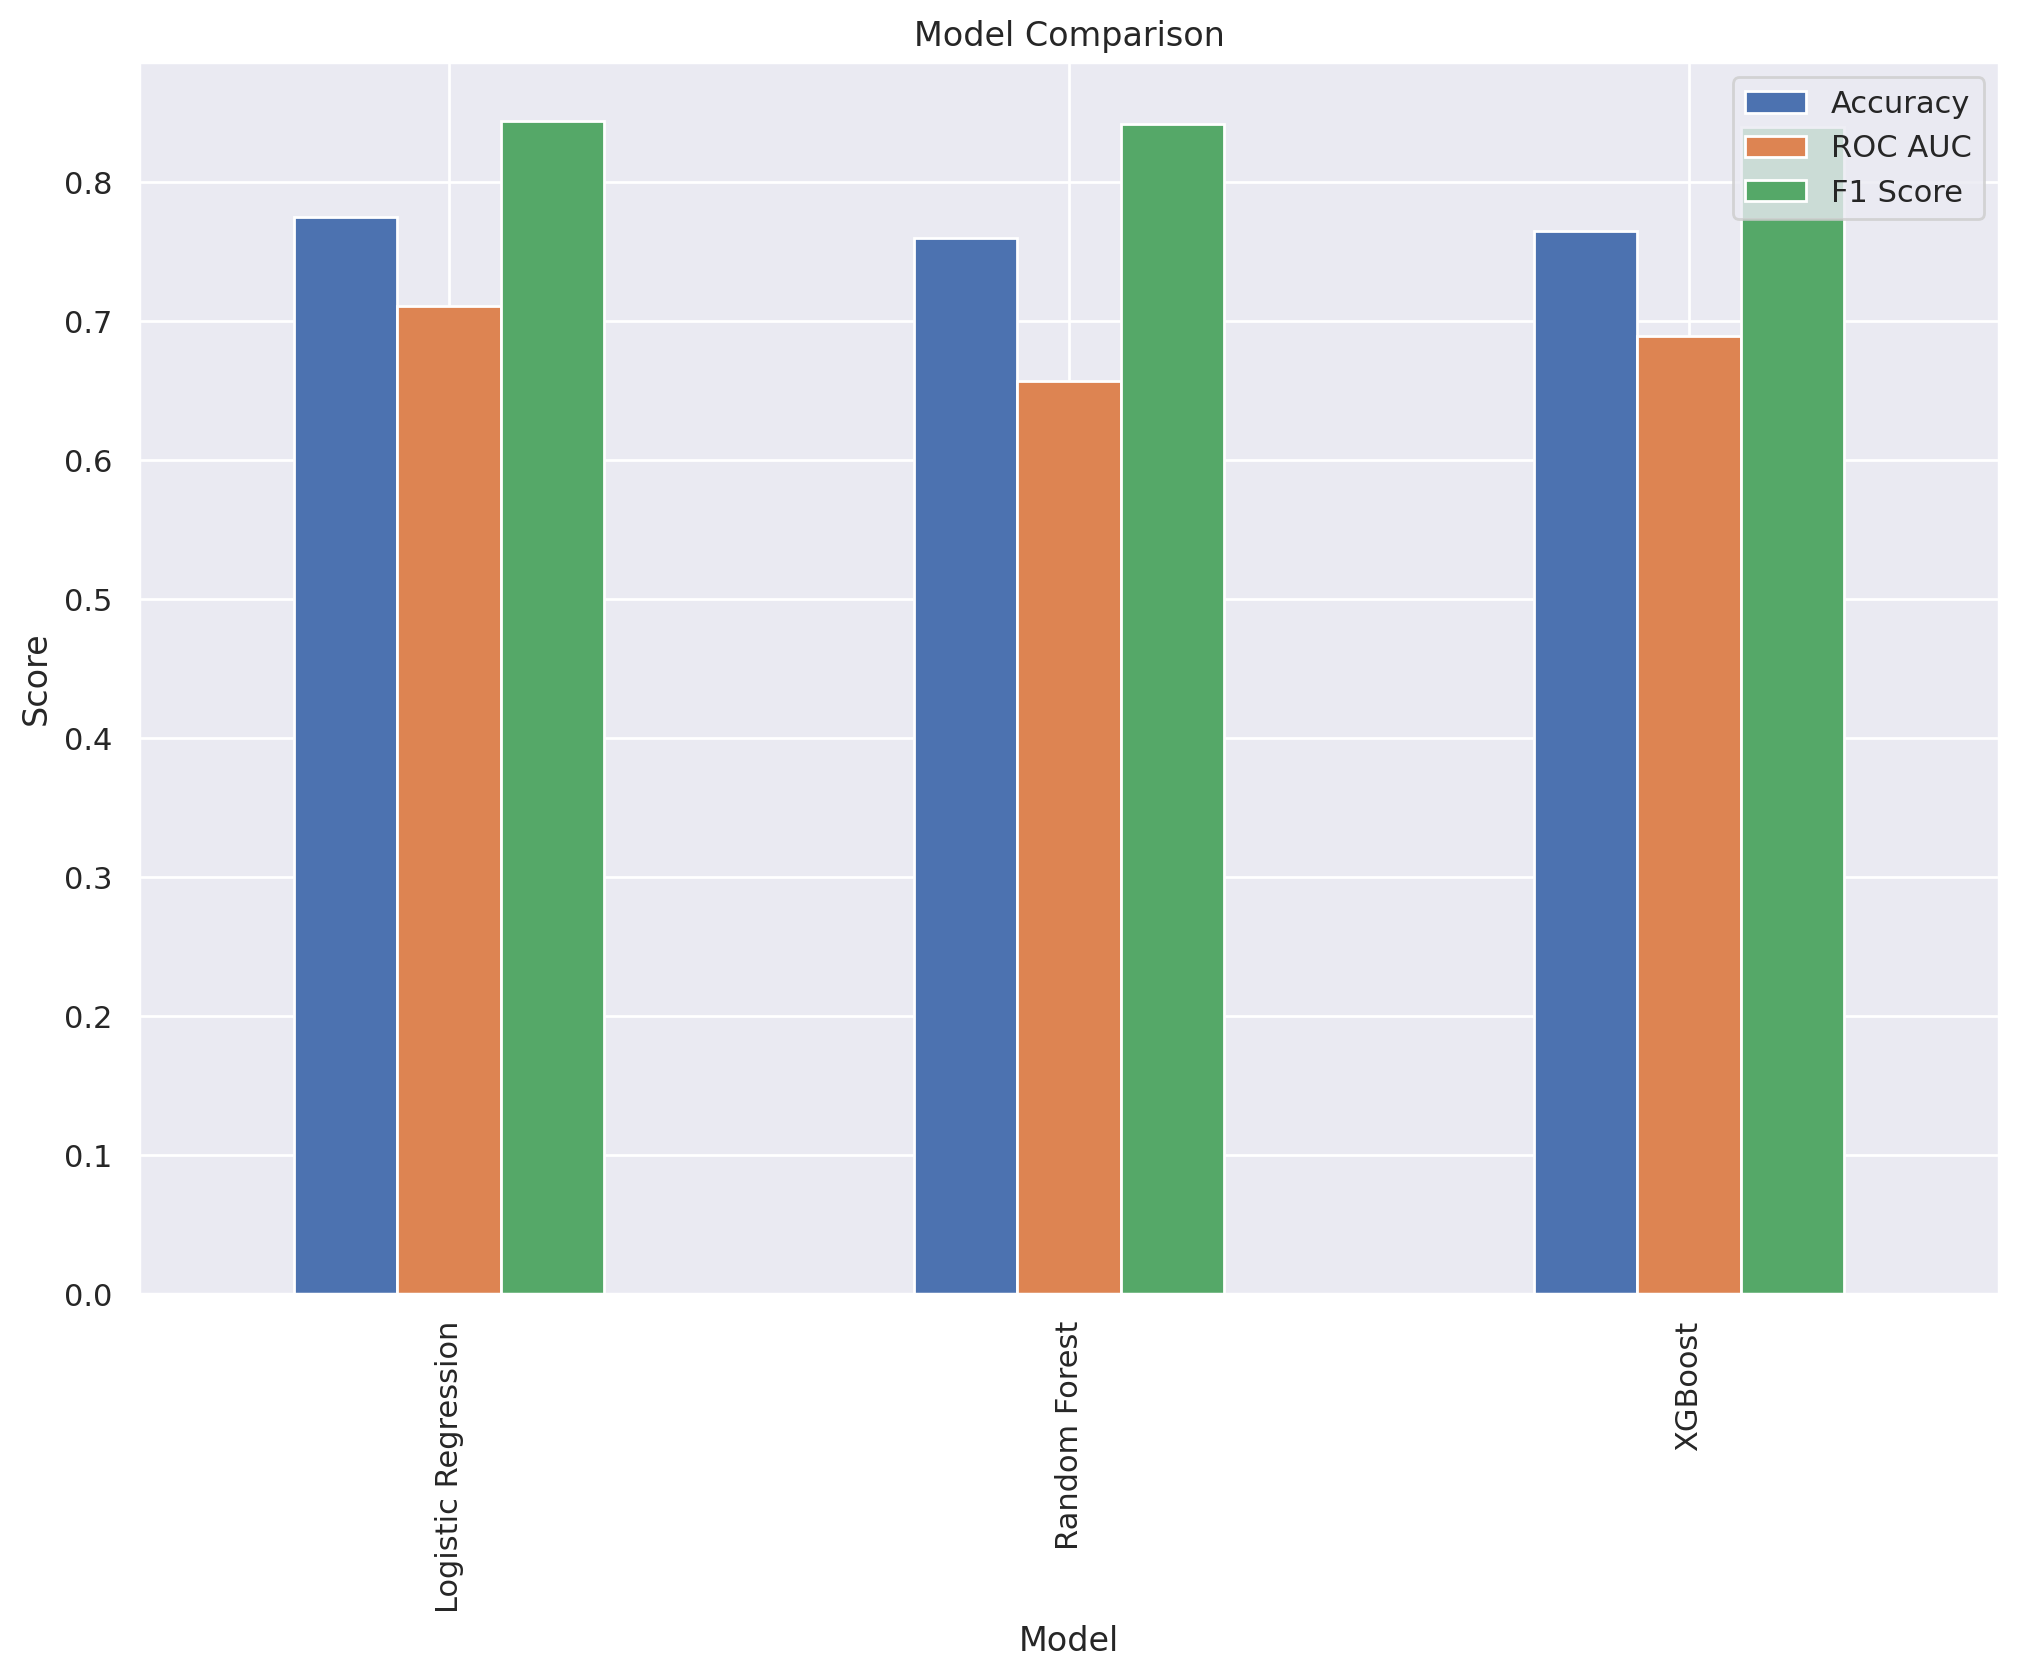

In [34]:
results = {
    'Model': ['Logistic Regression', 'Random Forest', 'XGBoost'],
    'Accuracy': [accuracy_score(y_test, log_reg_preds), accuracy_score(y_test, rf_preds), accuracy_score(y_test, xgb_preds)],
    'ROC AUC': [roc_auc_score(y_test, log_reg_preds), roc_auc_score(y_test, rf_preds), roc_auc_score(y_test, xgb_preds)],
    'F1 Score': [f1_score(y_test, log_reg_preds), f1_score(y_test, rf_preds), f1_score(y_test, xgb_preds)]
}

results_df = pd.DataFrame(results)
print(results_df)

results_df.set_index('Model').plot(kind='bar', figsize=(12, 8))
plt.title('Model Comparison')
plt.ylabel('Score')
plt.show()

На этом этапе все модели сравнимы, но лучше всех справляется логистическая регрессия.

***Часть 4: подбор гиперпараметров***

In [37]:
from sklearn.linear_model import Ridge
from sklearn.model_selection import GridSearchCV

Основной гиперпараметр, который подбирается в Ridge-регрессии, это alpha. Параметр alpha контролирует степень регуляризации в модели Ridge-регрессии. Регуляризация добавляет штраф за большие коэффициенты модели, что помогает предотвратить переобучение. Малые значения alpha приводят к минимальной регуляризации, что может позволить модели лучше подогнаться к обучающим данным, большие значения alpha усиливают регуляризацию, делая модель более гладкой и устойчивой к шуму, но с риском недообучения. Подбираемая Alpha варьируется в диапазоне от 1e-4 до 1e+4 (от 0.0001 до 10000).

Fitting 5 folds for each of 50 candidates, totalling 250 fits
[CV] END ........................alpha=9.999999999999999e-05; total time=   0.0s
[CV] END ........................alpha=9.999999999999999e-05; total time=   0.0s
[CV] END ........................alpha=9.999999999999999e-05; total time=   0.0s
[CV] END ........................alpha=9.999999999999999e-05; total time=   0.0s
[CV] END ........................alpha=9.999999999999999e-05; total time=   0.0s
[CV] END .......................alpha=0.00014563484775012442; total time=   0.0s
[CV] END .......................alpha=0.00014563484775012442; total time=   0.0s
[CV] END .......................alpha=0.00014563484775012442; total time=   0.0s
[CV] END .......................alpha=0.00014563484775012442; total time=   0.0s
[CV] END .......................alpha=0.00014563484775012442; total time=   0.0s
[CV] END .......................alpha=0.00021209508879201902; total time=   0.0s
[CV] END .......................alpha=0.0002120

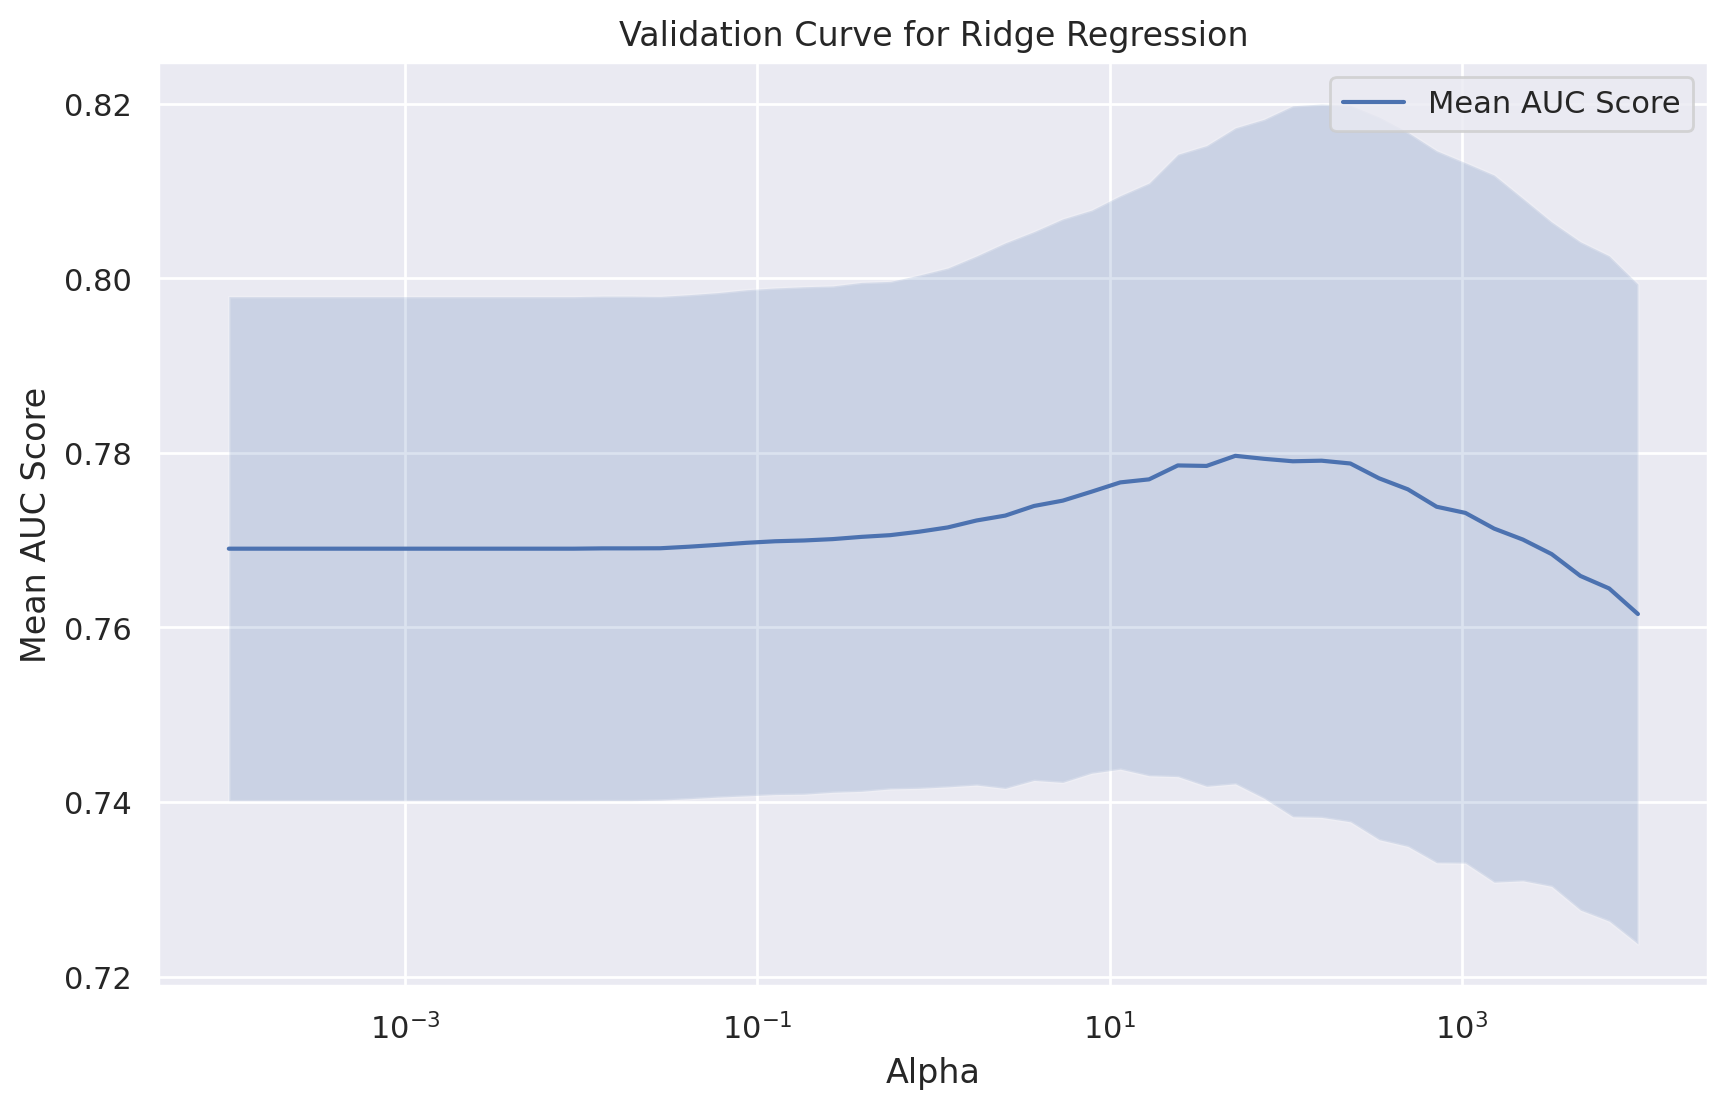

In [38]:
param_grid = {
    'alpha': np.logspace(-4, 4, 50)
}

ridge = Ridge(random_state=42)
grid_search = GridSearchCV(estimator=ridge, param_grid=param_grid, cv=5, scoring='roc_auc', verbose=2)
grid_search.fit(X_train, y_train)
print(f"Best parameters found: {grid_search.best_params_}")

results = grid_search.cv_results_
plt.figure(figsize=(10, 6))
plt.semilogx(param_grid['alpha'], results['mean_test_score'], label='Mean AUC Score')
plt.fill_between(param_grid['alpha'], results['mean_test_score'] - results['std_test_score'], results['mean_test_score'] + results['std_test_score'], alpha=0.2)
plt.xlabel('Alpha')
plt.ylabel('Mean AUC Score')
plt.title('Validation Curve for Ridge Regression')
plt.legend()
plt.show()

Ridge Regression:
Accuracy: 0.8000
ROC AUC: 0.8462
F1 Score: 0.8649


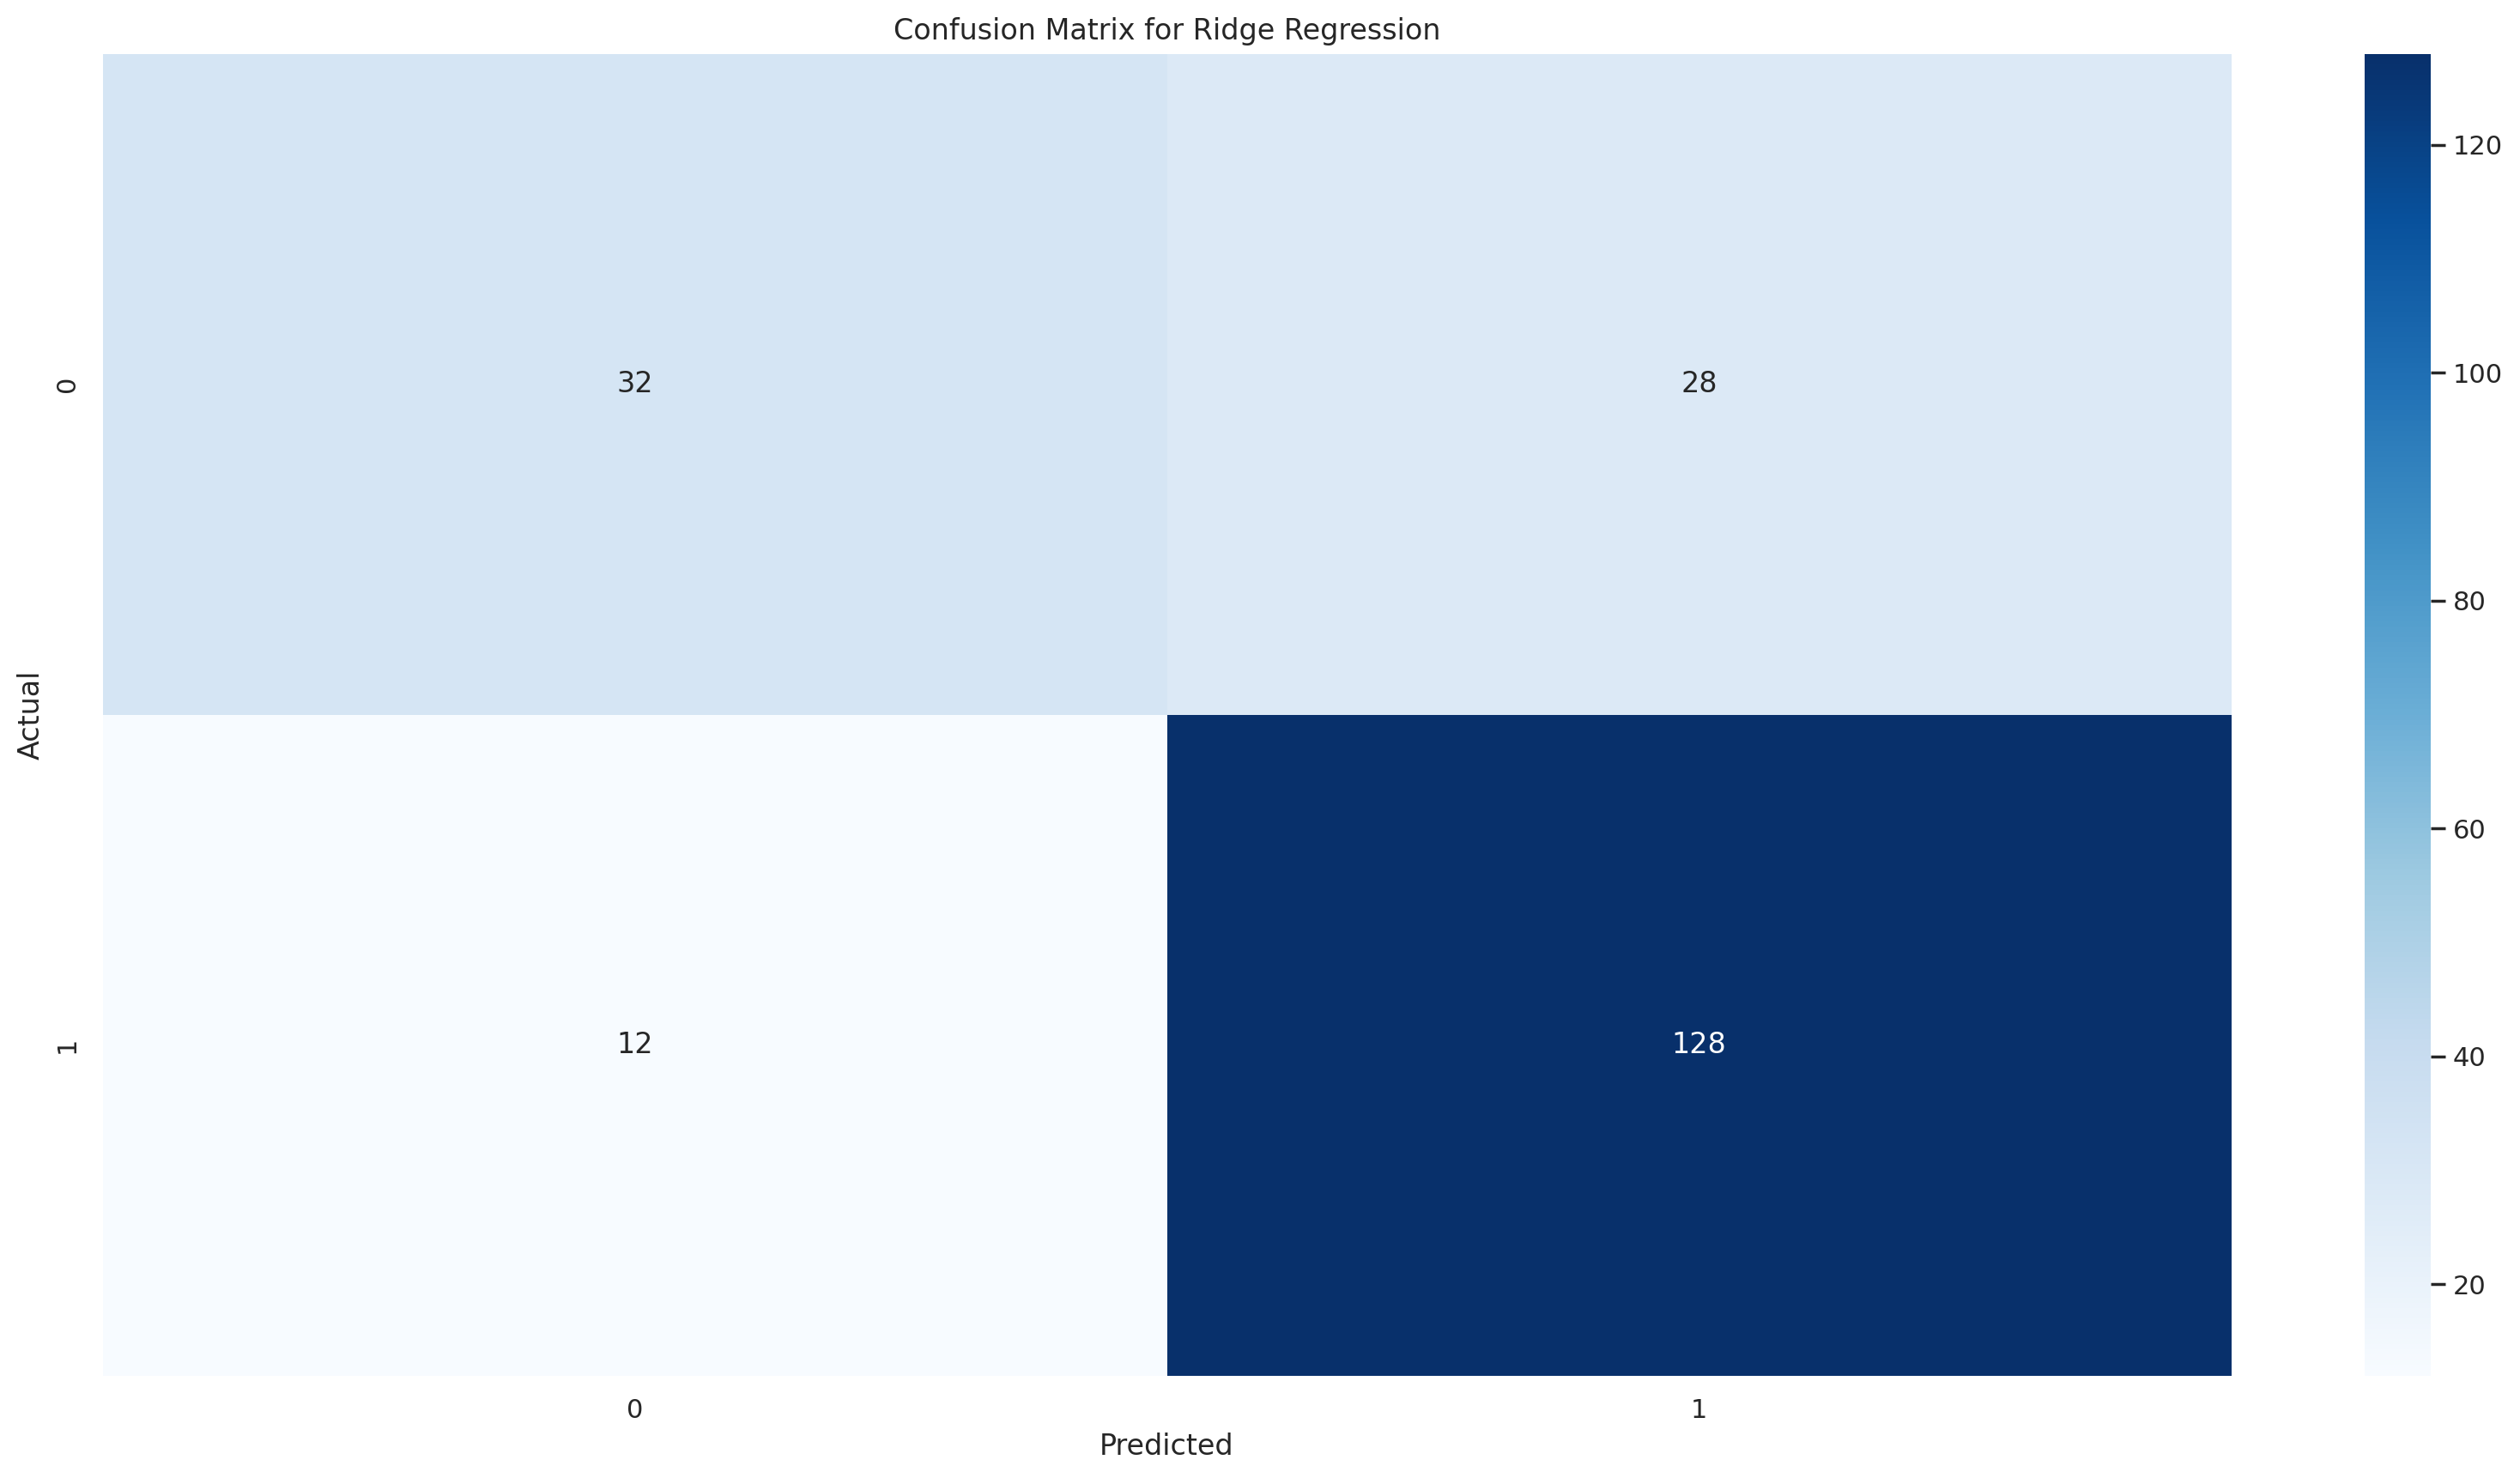

In [39]:
best_ridge = grid_search.best_estimator_
best_ridge.fit(X_train, y_train)
ridge_preds = best_ridge.predict(X_test)
ridge_preds_binary = (ridge_preds >= 0.5).astype(int)

print("Ridge Regression:")
print(f"Accuracy: {accuracy_score(y_test, ridge_preds_binary):.4f}")
print(f"ROC AUC: {roc_auc_score(y_test, ridge_preds):.4f}")
print(f"F1 Score: {f1_score(y_test, ridge_preds_binary):.4f}")

conf_matrix = confusion_matrix(y_test, ridge_preds_binary)
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix for Ridge Regression')
plt.show()

Теперь подберем оптимальные гиперпараметры случайного леса. Я перебираю n_estimators (количество деревьев в лесу). Большее количество деревьев может улучшить точность модели, но увеличивает время обучения и предсказания. max_depth (максимальная глубина деревьев) ограничивает максимальную глубину каждого дерева в лесу. Глубокие деревья могут захватывать больше деталей в данных, но могут привести к переобучению.min_samples_split (минимальное количество образцов для разбиения узла) определяет минимальное количество образцов, необходимых для разбиения узла. Меньшие значения могут привести к более детализированным деревьям, но могут способствовать переобучению. min_samples_leaf (минимальное количество образцов в листе) определяет минимальное количество образцов, которые должны быть в листе (конечном узле дерева). Большее количество образцов в листе может сделать модель более устойчивой и менее подверженной переобучению.

Fitting 5 folds for each of 108 candidates, totalling 540 fits
[CV] END max_depth=None, min_samples_leaf=1, min_samples_split=2, n_estimators=50; total time=   0.1s
[CV] END max_depth=None, min_samples_leaf=1, min_samples_split=2, n_estimators=50; total time=   0.1s
[CV] END max_depth=None, min_samples_leaf=1, min_samples_split=2, n_estimators=50; total time=   0.1s
[CV] END max_depth=None, min_samples_leaf=1, min_samples_split=2, n_estimators=50; total time=   0.1s
[CV] END max_depth=None, min_samples_leaf=1, min_samples_split=2, n_estimators=50; total time=   0.1s
[CV] END max_depth=None, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time=   0.3s
[CV] END max_depth=None, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time=   0.3s
[CV] END max_depth=None, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time=   0.3s
[CV] END max_depth=None, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time=   0.3s
[CV] END max_de

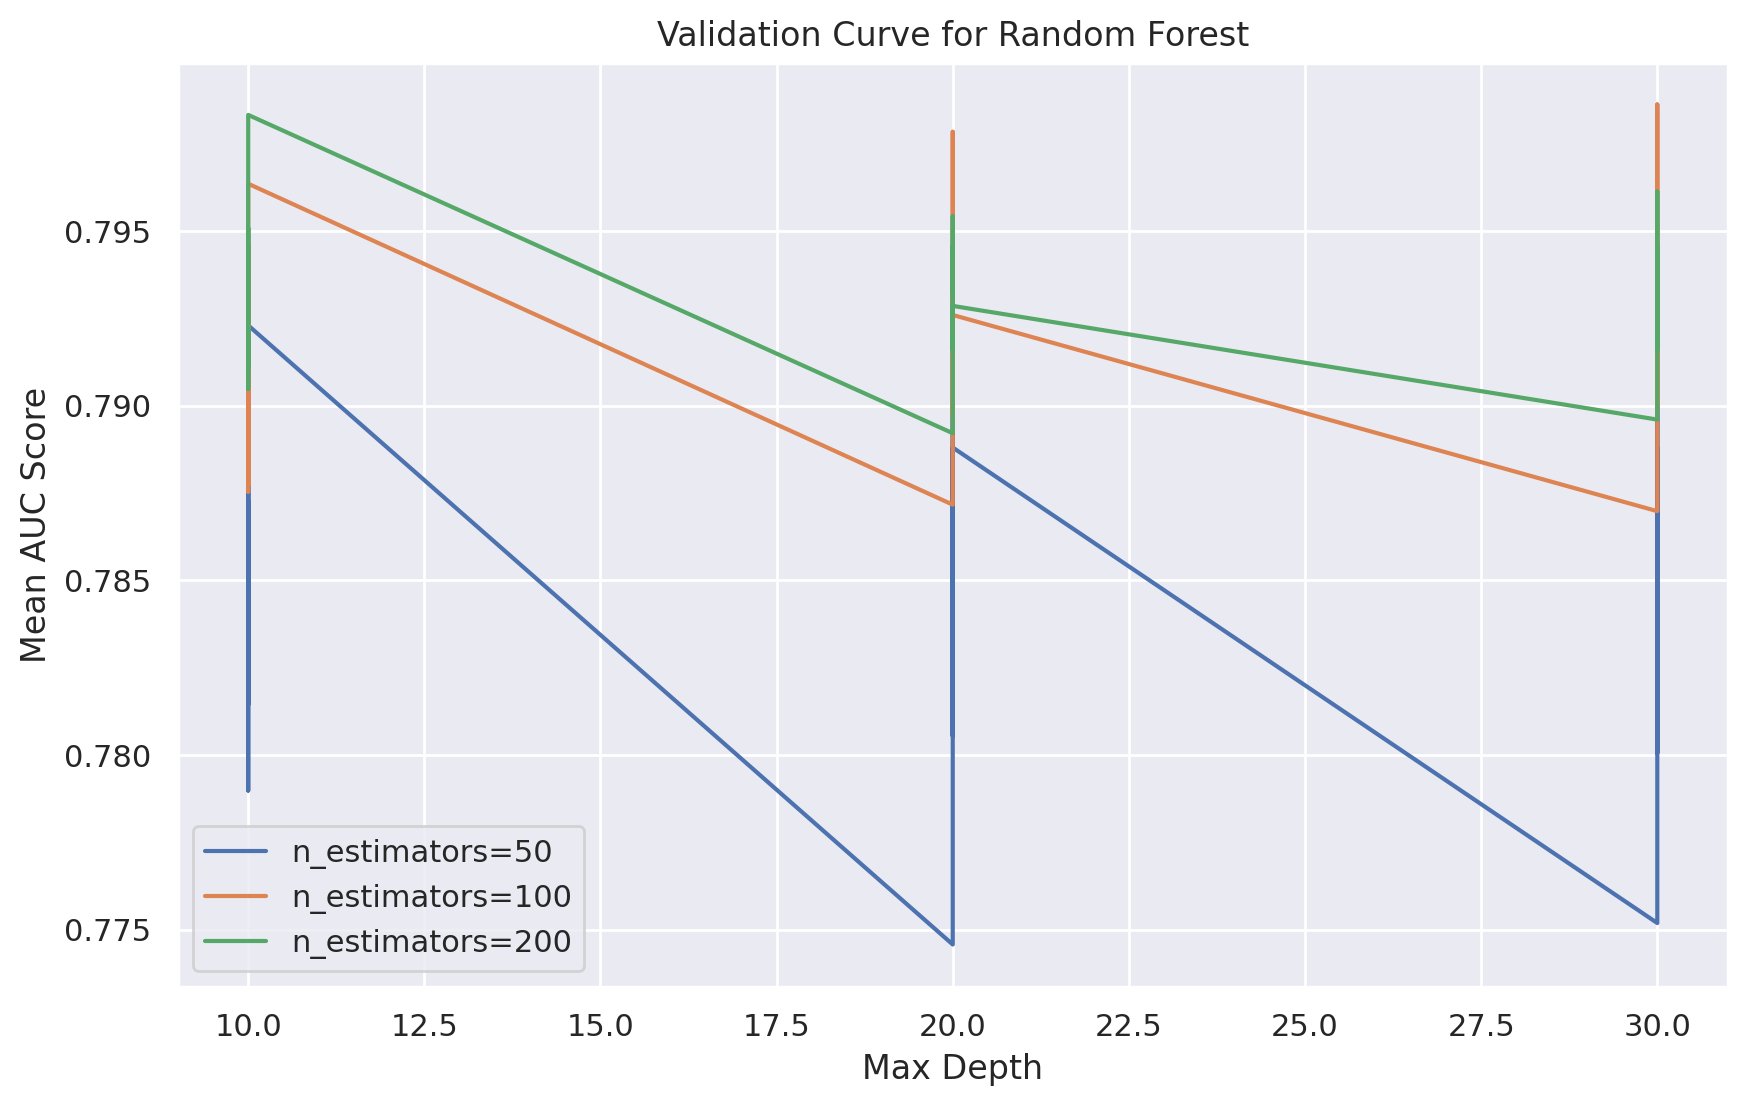

In [40]:
param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

rf = RandomForestClassifier(random_state=42)
grid_search = GridSearchCV(estimator=rf, param_grid=param_grid, cv=5, scoring='roc_auc', verbose=2)
grid_search.fit(X_train, y_train)
print(f"Best parameters found: {grid_search.best_params_}")

results = grid_search.cv_results_
mean_test_scores = results['mean_test_score']

plt.figure(figsize=(10, 6))
for i, param in enumerate(param_grid['n_estimators']):
    param_mask = results['param_n_estimators'] == param
    plt.plot(
        [None if val is None else val for val in results['param_max_depth'][param_mask]],
        mean_test_scores[param_mask],
        label=f'n_estimators={param}'
    )

plt.xlabel('Max Depth')
plt.ylabel('Mean AUC Score')
plt.title('Validation Curve for Random Forest')
plt.legend()
plt.show()

Random Forest:
Accuracy: 0.7750
ROC AUC: 0.8212
F1 Score: 0.8525


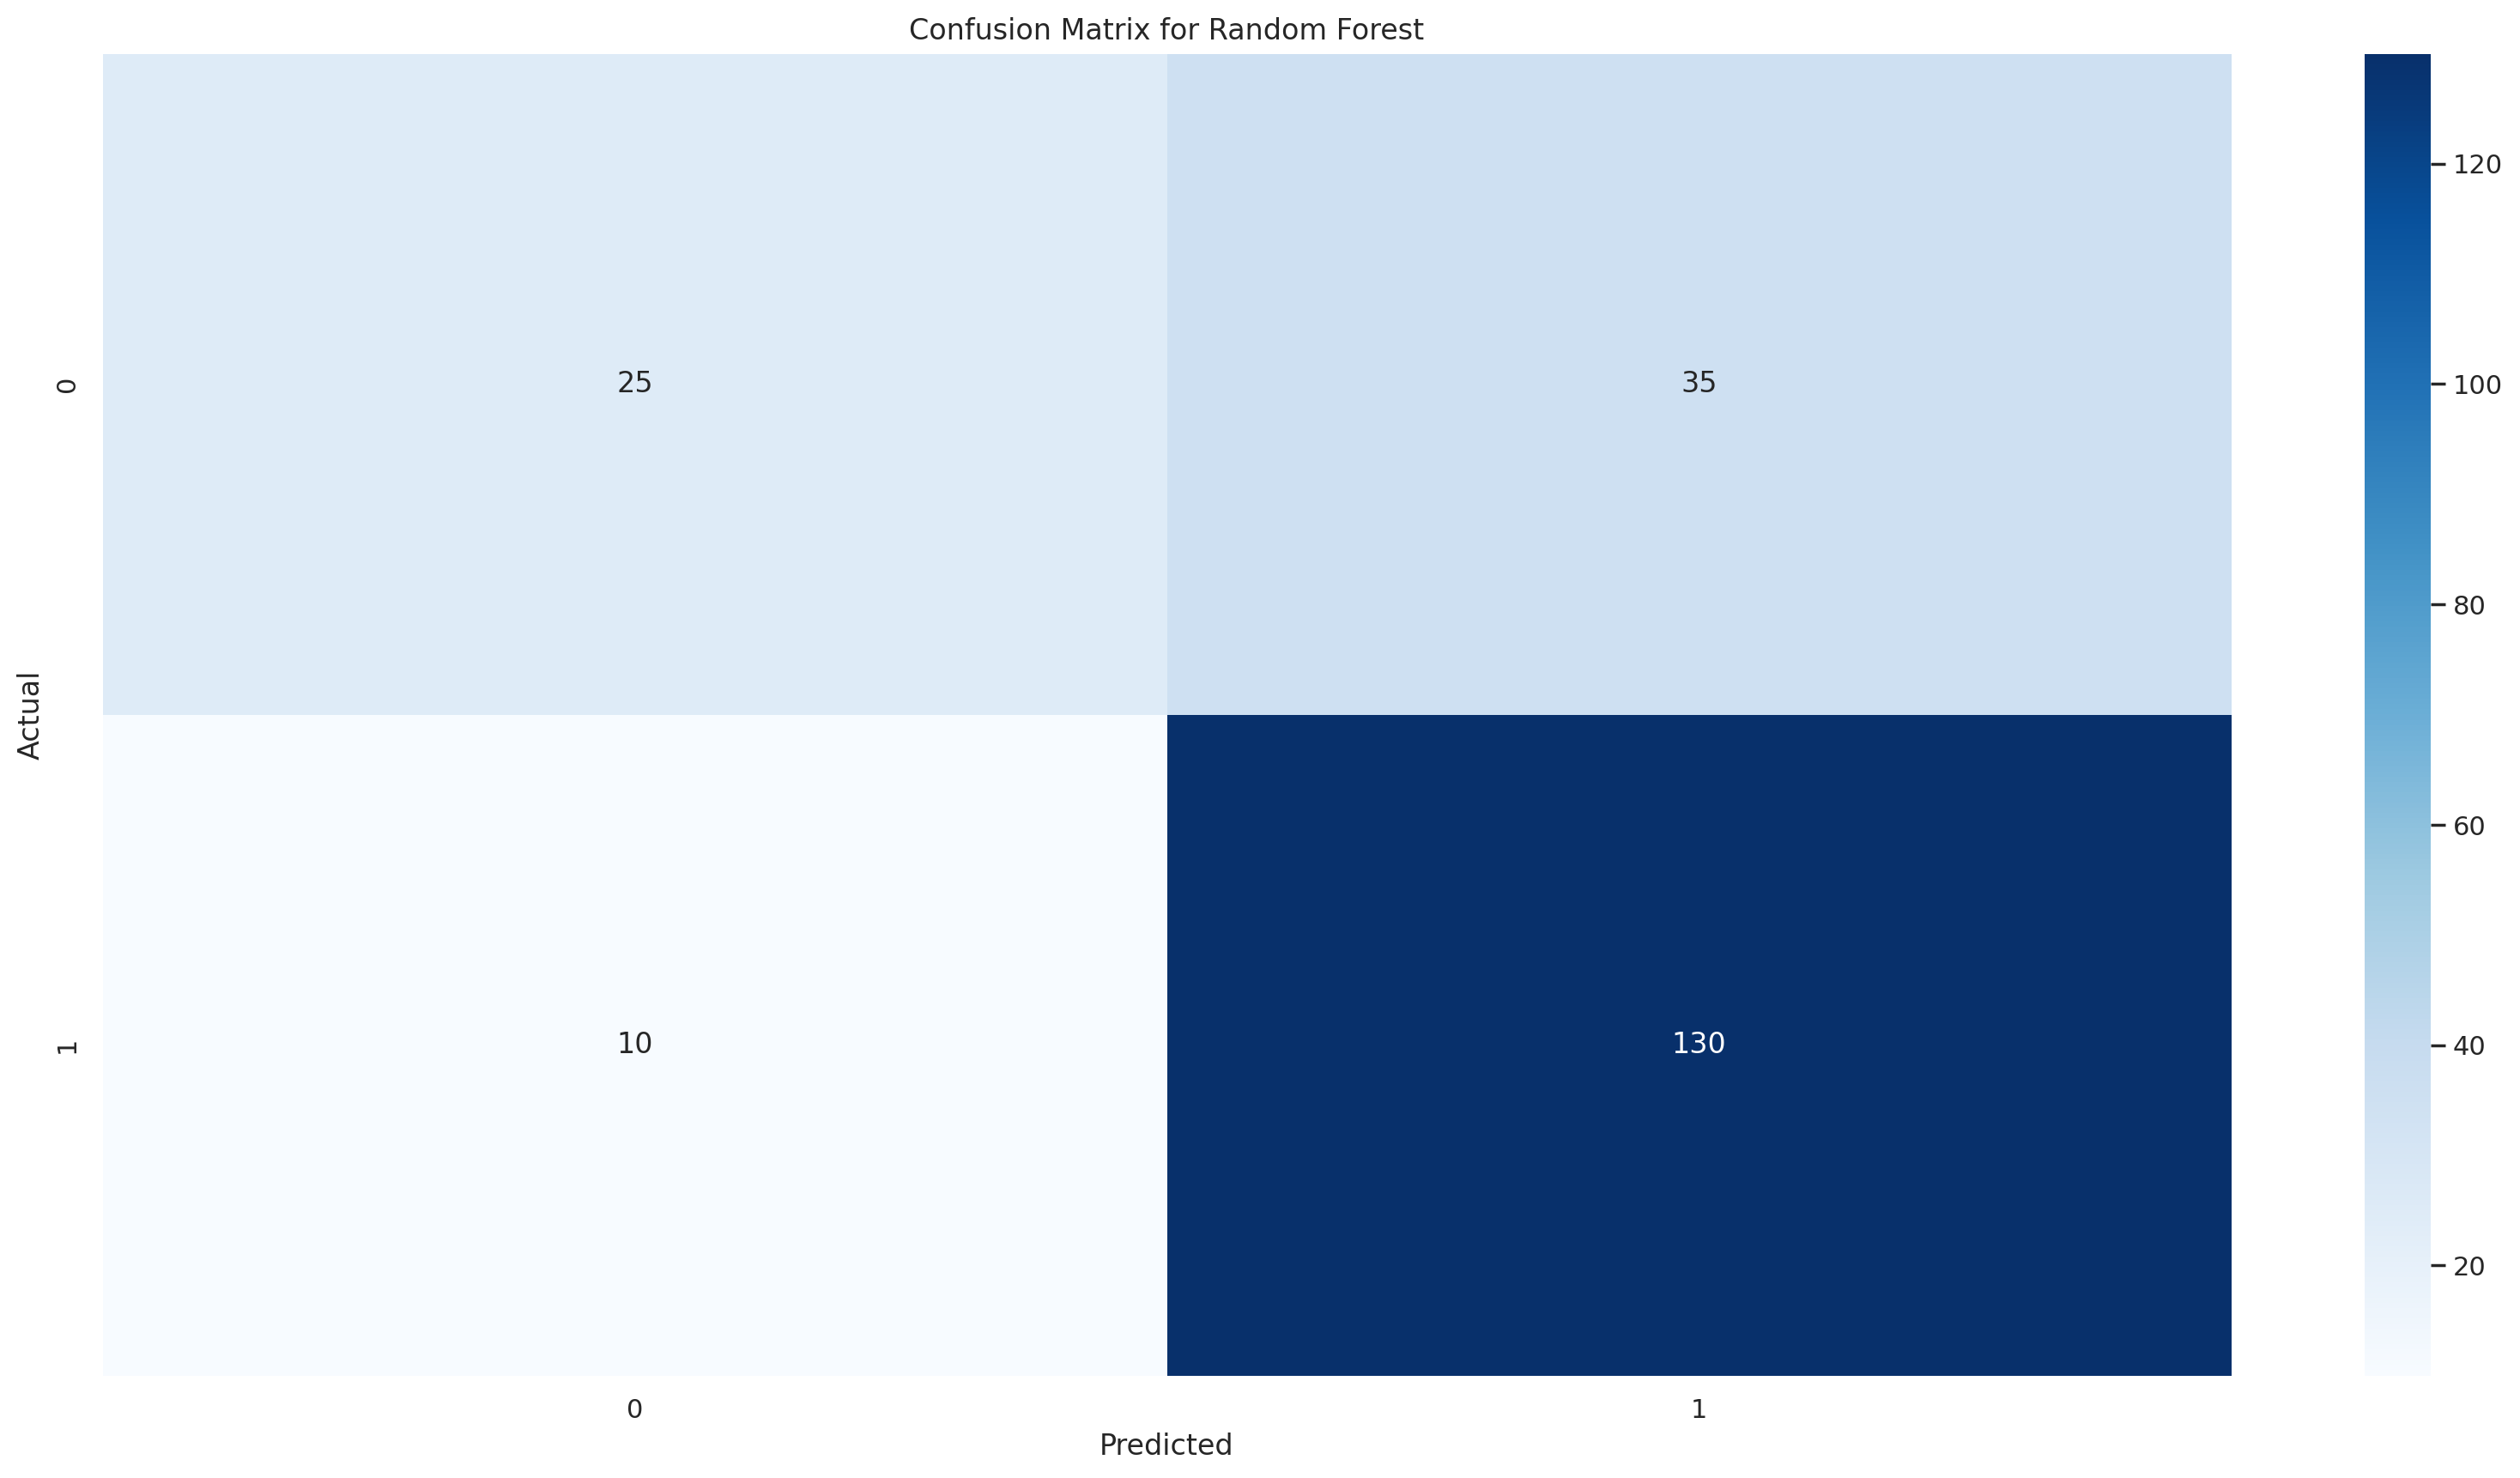

In [41]:
best_rf = grid_search.best_estimator_
best_rf.fit(X_train, y_train)
rf_preds = best_rf.predict(X_test)
rf_preds_proba = best_rf.predict_proba(X_test)[:, 1]

print("Random Forest:")
print(f"Accuracy: {accuracy_score(y_test, rf_preds):.4f}")
print(f"ROC AUC: {roc_auc_score(y_test, rf_preds_proba):.4f}")
print(f"F1 Score: {f1_score(y_test, rf_preds):.4f}")

conf_matrix = confusion_matrix(y_test, rf_preds)
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix for Random Forest')
plt.show()

Теперь подберем гиперпараметры для бустинга, они пересекаются со случайнм лесом: n_estimators (количество деревьев), max_depth (максимальная глубина деревьев). Но есть и другие learning_rate (скорость обучения) контролирует вклад каждого дерева в окончательную модель. Низкое значение делает обучение более медленным, но может улучшить обобщающую способность модели. subsample (доля выборки для каждого дерева) определяет долю выборки, используемой для обучения каждого дерева. Это помогает уменьшить переобучение. colsample_bytree (доля признаков для каждого дерева) определяет долю признаков, используемых для обучения каждого дерева. Это помогает уменьшить корреляцию между деревьями и снижает переобучение.

Fitting 5 folds for each of 243 candidates, totalling 1215 fits
[CV] END colsample_bytree=0.6, learning_rate=0.01, max_depth=3, n_estimators=50, subsample=0.6; total time=   0.1s
[CV] END colsample_bytree=0.6, learning_rate=0.01, max_depth=3, n_estimators=50, subsample=0.6; total time=   0.1s
[CV] END colsample_bytree=0.6, learning_rate=0.01, max_depth=3, n_estimators=50, subsample=0.6; total time=   0.1s
[CV] END colsample_bytree=0.6, learning_rate=0.01, max_depth=3, n_estimators=50, subsample=0.6; total time=   0.1s
[CV] END colsample_bytree=0.6, learning_rate=0.01, max_depth=3, n_estimators=50, subsample=0.6; total time=   0.1s
[CV] END colsample_bytree=0.6, learning_rate=0.01, max_depth=3, n_estimators=50, subsample=0.8; total time=   0.1s
[CV] END colsample_bytree=0.6, learning_rate=0.01, max_depth=3, n_estimators=50, subsample=0.8; total time=   0.0s
[CV] END colsample_bytree=0.6, learning_rate=0.01, max_depth=3, n_estimators=50, subsample=0.8; total time=   0.1s
[CV] END colsamp

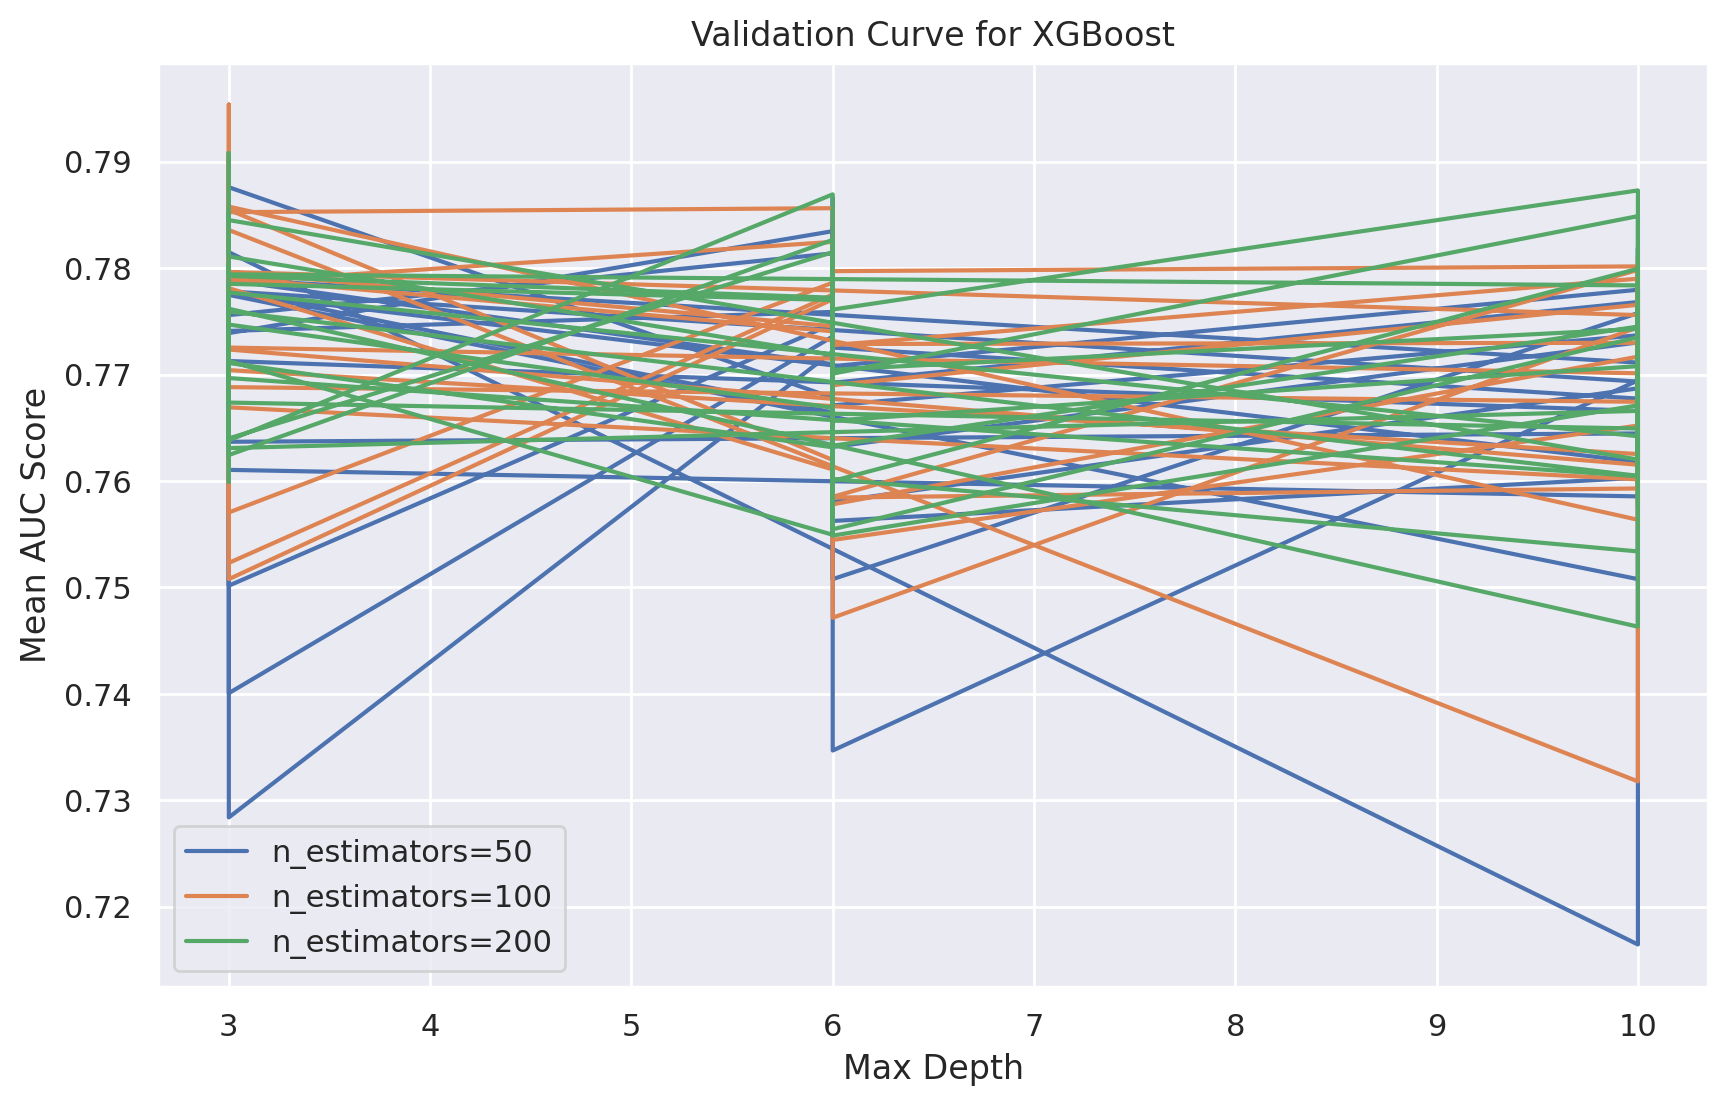

In [42]:
param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [3, 6, 10],
    'learning_rate': [0.01, 0.1, 0.2],
    'subsample': [0.6, 0.8, 1.0],
    'colsample_bytree': [0.6, 0.8, 1.0]
}

xgb_model = XGBClassifier(objective='binary:logistic', random_state=42, use_label_encoder=False, enable_categorical=True)
grid_search_xgb = GridSearchCV(estimator=xgb_model, param_grid=param_grid, cv=5, scoring='roc_auc', verbose=2)
grid_search_xgb.fit(X_train, y_train)
print(f"Best parameters found: {grid_search_xgb.best_params_}")

results_xgb = grid_search_xgb.cv_results_
mean_test_scores_xgb = results_xgb['mean_test_score']

plt.figure(figsize=(10, 6))
for i, param in enumerate(param_grid['n_estimators']):
    param_mask = results_xgb['param_n_estimators'] == param
    plt.plot(
        [None if val is None else val for val in results_xgb['param_max_depth'][param_mask]],
        mean_test_scores_xgb[param_mask],
        label=f'n_estimators={param}'
    )

plt.xlabel('Max Depth')
plt.ylabel('Mean AUC Score')
plt.title('Validation Curve for XGBoost')
plt.legend()
plt.show()

XGBoost:
Accuracy: 0.7750
ROC AUC: 0.8298
F1 Score: 0.8454


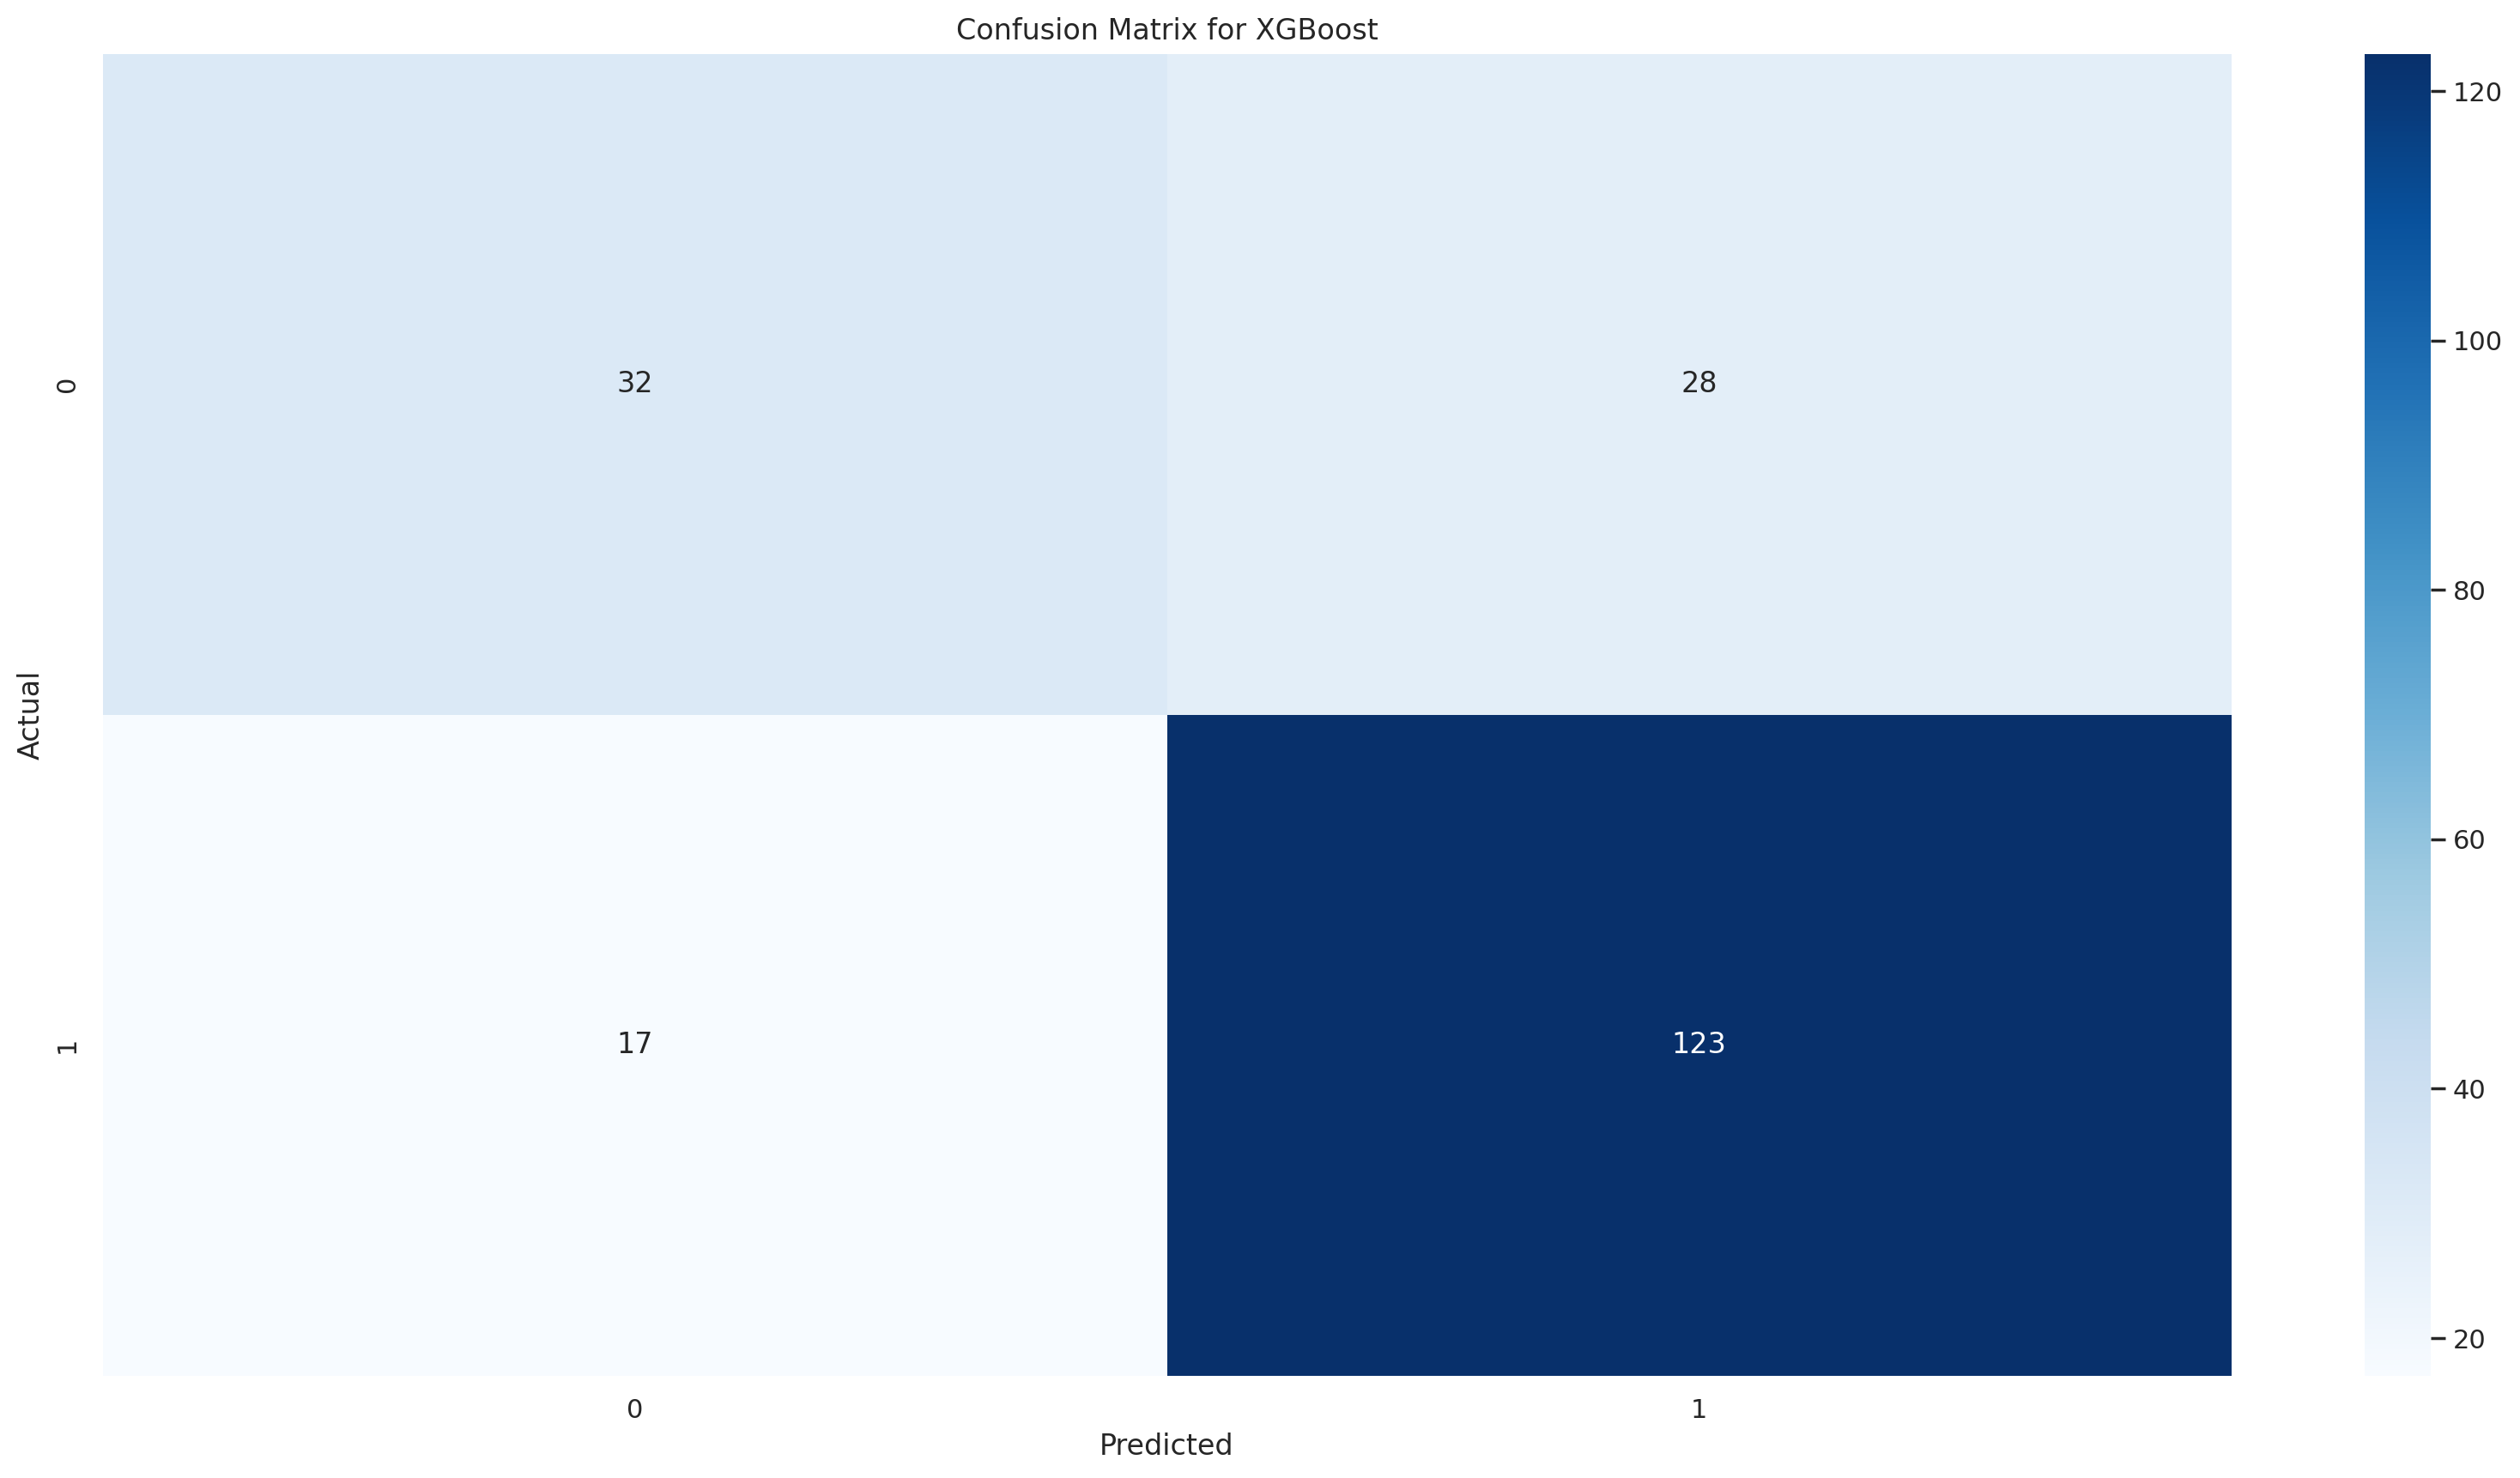

In [43]:
best_xgb = grid_search_xgb.best_estimator_
best_xgb.fit(X_train, y_train)
xgb_preds = best_xgb.predict(X_test)
xgb_preds_proba = best_xgb.predict_proba(X_test)[:, 1]

print("XGBoost:")
print(f"Accuracy: {accuracy_score(y_test, xgb_preds):.4f}")
print(f"ROC AUC: {roc_auc_score(y_test, xgb_preds_proba):.4f}")
print(f"F1 Score: {f1_score(y_test, xgb_preds):.4f}")

conf_matrix_xgb = confusion_matrix(y_test, xgb_preds)
sns.heatmap(conf_matrix_xgb, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix for XGBoost')
plt.show()

Сравним результаты построенных моделей:

                 Model  Accuracy   ROC AUC  F1 Score
0  Logistic Regression     0.775  0.710714  0.844291
1        Random Forest     0.775  0.821190  0.852459
2              XGBoost     0.775  0.829762  0.845361
3     Ridge Regression     0.800  0.846190  0.864865


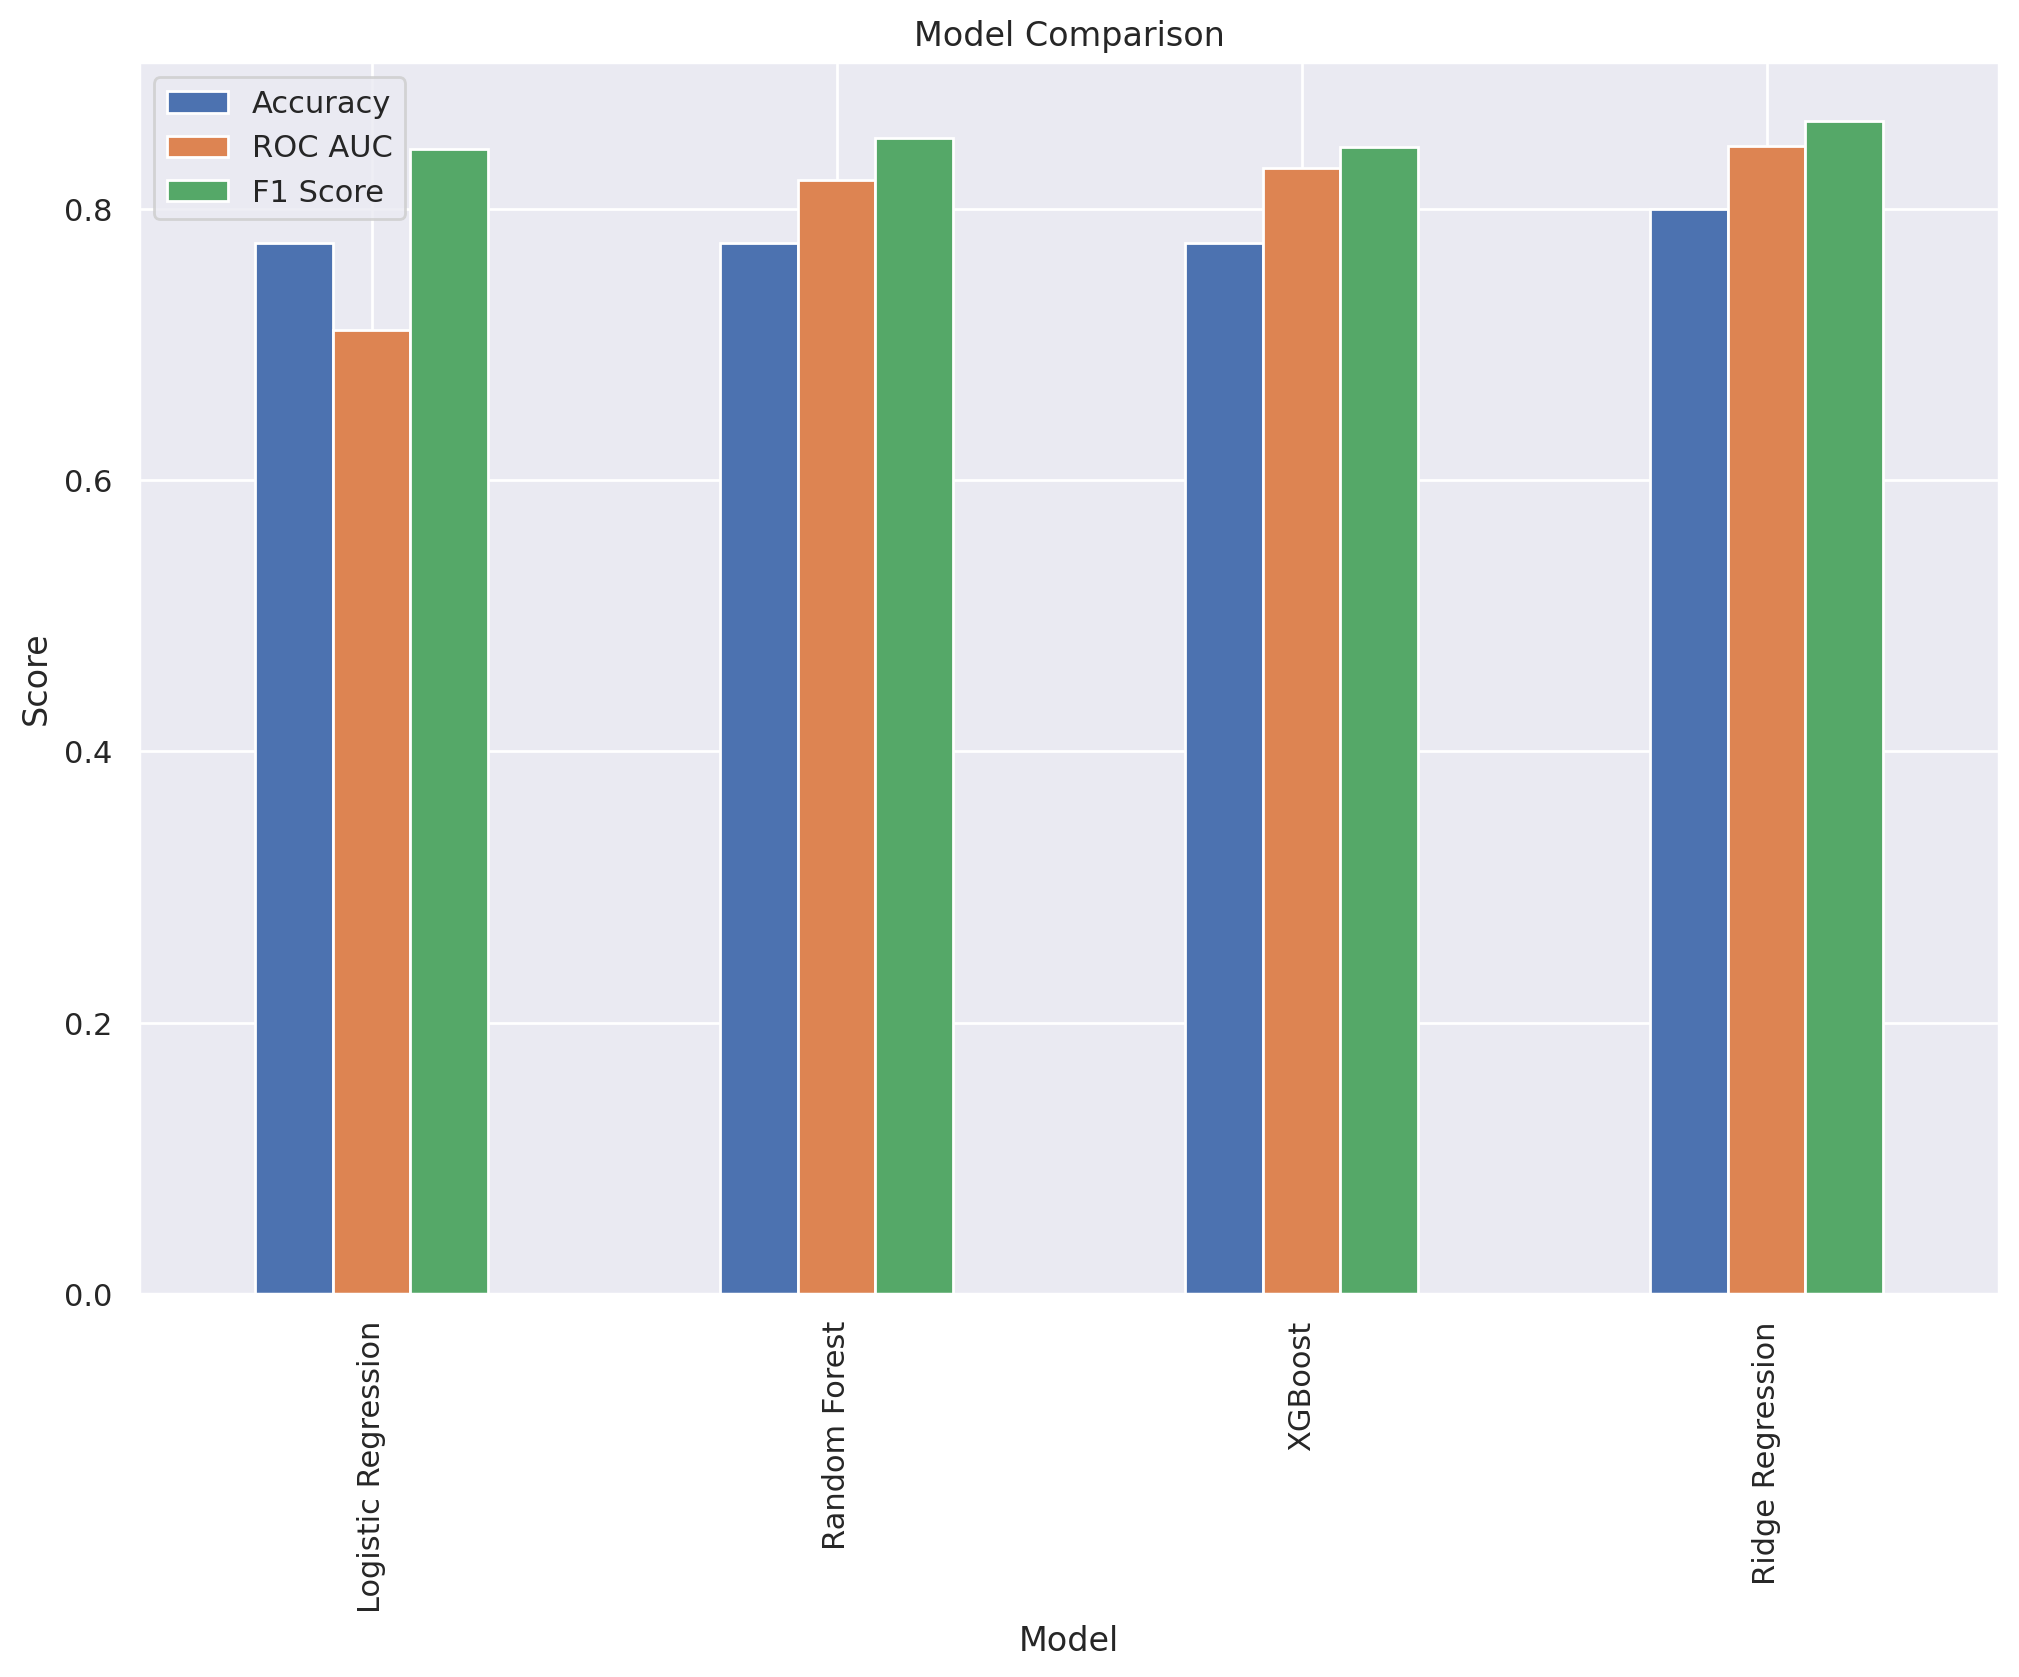

In [44]:
results = {
    'Model': ['Logistic Regression', 'Random Forest', 'XGBoost', 'Ridge Regression'],
    'Accuracy': [accuracy_score(y_test, log_reg_preds), accuracy_score(y_test, rf_preds), accuracy_score(y_test, xgb_preds), accuracy_score(y_test, ridge_preds_binary)],
    'ROC AUC': [roc_auc_score(y_test, log_reg_preds), roc_auc_score(y_test, rf_preds_proba), roc_auc_score(y_test, xgb_preds_proba), roc_auc_score(y_test, ridge_preds)],
    'F1 Score': [f1_score(y_test, log_reg_preds), f1_score(y_test, rf_preds), f1_score(y_test, xgb_preds), f1_score(y_test, ridge_preds_binary)]
}

results_df = pd.DataFrame(results)
print(results_df)

results_df.set_index('Model').plot(kind='bar', figsize=(12, 8))
plt.title('Model Comparison')
plt.ylabel('Score')
plt.show()

Как ни удивительно, но лучшие результаты показала регуляризованная логистичсекая регрессия, поздравим ее с таким успехом, кроме того, она самая быстрая и самая интерпретируемая.